# Index

# Modules and tools :

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from datetime import datetime, date, time
import requests
import plotly.express as px
import os

# Introduction

### Beer dataset

The dataset come from two different websites, from 2001 to 2007 (17years) : https://www.ratebeer.com/ and https://www.beeradvocate.com/. This two platform where one can review and share about beers. Technically it consists of three csv files and two txt files for each websites :
1) beers.csv : informations about the beers
2) breweries.csv : informations about the breweries
3) users.csv : informations about the users
4) rating.txt : all the different rating for each beer
5) reviews.txt : all the different review for each beer

There is also matched dataset between the two websites.

In [2]:
BA_dir = './datasets/BeerAdvocate/'
BA_sample_file = f'{BA_dir}/reviews_sample.txt'
BA_users_file = f'{BA_dir}/users.csv'
BA_breweries_file = f'{BA_dir}/breweries.csv'
RB_dir = './datasets/RateBeer/'
RB_sample_file = f'{RB_dir}/reviews_sample.txt'
RB_users_file = f'{RB_dir}/users.csv'
RB_breweries_file = f'{RB_dir}/breweries.csv'

In [3]:
BA_beers_file = f'{BA_dir}/beers.csv'
RB_beers_file = f'{RB_dir}/beers.csv'

### Is it too big ?
One thing to consider when handling large dataset is there size, here we will try to see if it's problem.

For our project we will only need the beer, breweries and users file of each website.

In [4]:
def file_sizeMB(file_name):
    stat = os.stat(file_name)
    return stat.st_size / (1024*1024)

complete_size = 0
#for BeerAdvocate
for filename in os.listdir(BA_dir):
    file = os.path.join(BA_dir, filename)
    if os.path.isfile(file):
        print(f'{file} size in MegaBytes is {file_sizeMB(str(file))}')
        complete_size += file_sizeMB(str(file))
#for RateBeer
for filename in os.listdir(RB_dir):
    file = os.path.join(RB_dir, filename)
    if os.path.isfile(file):
        print(f'{file} size in MegaBytes is {file_sizeMB(str(file))}')
        complete_size += file_sizeMB(str(file))


print(complete_size)


./datasets/BeerAdvocate/BA_reviews.tar.gz size in MegaBytes is 71.24130630493164
./datasets/BeerAdvocate/beers.csv size in MegaBytes is 28.51298713684082
./datasets/BeerAdvocate/breweries.csv size in MegaBytes is 0.7867345809936523
./datasets/BeerAdvocate/reviews_sample.txt size in MegaBytes is 66.88321495056152
./datasets/BeerAdvocate/users.csv size in MegaBytes is 9.446638107299805
./datasets/RateBeer/beers.csv size in MegaBytes is 45.43974685668945
./datasets/RateBeer/breweries.csv size in MegaBytes is 1.013178825378418
./datasets/RateBeer/RB_reviews_1.tar.gz size in MegaBytes is 84.52471446990967
./datasets/RateBeer/RB_reviews_2.tar.gz size in MegaBytes is 67.54720973968506
./datasets/RateBeer/reviews_sample.txt size in MegaBytes is 0.025028228759765625
./datasets/RateBeer/users.csv size in MegaBytes is 3.1213817596435547
378.54214096069336


The file size of each dataset and format (.csv) can be handle pretty easily without any particular issues that we can think of.

### What's the model of our data and what's in it?
Let's take a look at the data given by BeerAdvocate :

In [5]:
user_ba = pd.read_csv(BA_users_file)
user_ba.head(10)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
5,2326,0,hellpop65.48993,Hellpop65,1.131966e+09,"United States, Kansas"
6,3098,0,latarnik.52897,Latarnik,1.133521e+09,"United States, New Jersey"
7,1866,23,rochefortchris.697017,RochefortChris,1.349172e+09,"United States, North Carolina"
8,1131,188,okcnittany.144868,OKCNittany,1.182766e+09,"United States, Oklahoma"
9,9987,16,jaydoc.265507,jaydoc,1.226488e+09,"United States, Kansas"


In [6]:
beers_ba = pd.read_csv(BA_beers_file)
beers_ba.head(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
5,166068,Arpa,39913,Arpa (АРПА),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
6,166071,Eles,39914,Bear Beer,Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
7,166072,Eles Light,39914,Bear Beer,Euro Pale Lager,0,0,NaN,NaN,NaN,3.2,NaN,NaN,0,NaN
8,166074,Toroz Svetloye,39914,Bear Beer,American Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
9,166076,Toroz Temnoye,39914,Bear Beer,Euro Dark Lager,0,0,NaN,NaN,NaN,4.1,NaN,NaN,0,NaN


In [7]:
breweries_ba = pd.read_csv(BA_breweries_file)
breweries_ba.head(10)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
5,16051,Kyrgyzstan,Pivzavod Uzgen,0
6,16052,Kyrgyzstan,Steinbrau Pub,4
7,39917,Kyrgyzstan,Usu-Salkin Pivo,3
8,37262,Gabon,Societe des Brasseries du Gabon (SOBRAGA),1
9,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5


As we can see it seems that the data are stored in a relational model (i.e., the index ```brewery_id``` in the beers.csv dataset is the foreign key that point to the primary key ```id``` in the breweries.csv. 

We can confirm our observation with a prelimenary check on the name of the brewery for the first row of ```beer_ba```: 

In [8]:
beers_ba.iloc[0].brewery_name == breweries_ba[breweries_ba.id == beers_ba.iloc[0].brewery_id].name

0    True
Name: name, dtype: bool

Ok so we have our first confirmation, we should make sure that there is no problem with the attribution of the key by performing the test for each rows but for now let assume there is no issues.

Concerning what's in the data we can see that for the breweries and users dataset the name colunm are pretty straightforward and speaks for itself. Concerning the beers dataset some name colunm are understandable by themself and other don't. For now there is a lot of NaN values (one thing to notice is that even if a beer doesn't have rating it is still in the dataset). Maybe looking at other value will help understand.

In [9]:
beers_ba[~beers_ba.isna().any(axis=1)].head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
25,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,4.8,3.439867,-0.649167,59,3.504068
27,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,4.2,3.556094,-0.478579,48,3.580417
3231,18650,Tawny Owl,6872,Cotleigh Brewery,English Bitter,20,16,3.71,84.0,80.0,3.8,3.707000,-0.216512,16,3.680625
6185,21,Deep Shaft Stout,18,Freeminer Brewery Ltd.,Foreign / Export Stout,66,66,4.25,90.0,94.0,6.2,4.254848,0.751762,66,4.254848
6194,856,Shakemantle Ginger Ale,18,Freeminer Brewery Ltd.,Herbed / Spiced Beer,12,12,3.75,84.0,86.0,5.0,3.750000,-0.128881,12,3.750000


1) ```avg``` is the the average rating out of 5 showing in the website for a particular beer.
2) ```avg_computed``` is the average score out of 5 computed with the combination of a weighted sum of the 5 different aspect of rating
3) ```zscore``` is the standardized score to compare the two website used in this paper https://dlab.epfl.ch/people/west/pub/Lederrey-West_WWW-18.pdf

In [10]:
# The datasets' location in the repository:

sample_file = 'datasets/BeerAdvocate/reviews_sample.txt'
users_file = 'datasets/BeerAdvocate/users.csv'
breweries_file = 'datasets/BeerAdvocate/breweries.csv'
beers_file = 'datasets/BeerAdvocate/beers.csv'
directory_BA = 'datasets/BeerAdvocate'
directory_RB = 'datasets/RateBeer'

# 0. Data cleaning

### Helper functions:

In [11]:
def transform_values(df):
    try:
        df['user_id'] = df['user_id'].astype(int)
    except:
        df['user_id'] = df['user_id'].apply(lambda x: str(x).strip())

    for field in ['beer_name', 'brewery_name', 'style']:
        df[field] = df[field].apply(lambda x: str(x).strip())
    for column_name in ['brewery_id', 'beer_id']:
        df[column_name] = df[column_name].astype(int)
    for column_name in ['abv', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']:
        df[column_name] = df[column_name].astype(float)
    df['review'] = df['review'].astype(bool)

    df['date'] = df['date'].apply(lambda x: datetime.fromtimestamp(int(x)))
    return df


def read_full_reviews_file(csv_file):
    colnames = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
    df = pd.read_csv(csv_file, sep='\|\|\|', names=colnames, engine='python')
    return df


def read_sample_reviews_file(file_path):
    def parse_dict(lines):
        result = {}
        for line in lines:
            key, value = line.split(':', 1)
            value = value.split('\n')[0]
            result[key] = value
        return result


    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    blank_lines_indexes = [index for index, line in enumerate(lines) if line.isspace()]

    data = []
    begin_index = 0
    for end_index in blank_lines_indexes:
        result_dict = parse_dict(lines[begin_index:end_index])
        data.append(result_dict)
        begin_index = end_index + 1
    df = pd.DataFrame(data)
    if not 'review' in list(df.columns):
        df['review'] = df.text.apply(lambda x: True if x else False)
    return transform_values(df)

convertion_dict = {
    'virgin islands (british)' : {
        'country': 'england',
        'state': 'virgin islands'
    },
    'virgin islands (u.s.)' : {
        'country': 'united states',
        'state': 'virgin islands'
    },
    'utah' : {
        'country': 'united states',
        'state': 'utah'
    },
    'illinois' : {
        'country': 'united states',
        'state': 'illinois'
    },
    'new york' : {
        'country': 'united states',
        'state': 'new york'
    }
}
def get_state_str(x):
    if x in convertion_dict.keys():
        return convertion_dict[x]['state']
    splitted = str(x).lower().strip().split(',')
    if len(splitted) > 1:
        return splitted[-1]
    return np.nan

def get_country_str(x):
    if x in convertion_dict.keys():
        return convertion_dict[x]['country']
    return str(x).lower().strip().split(',')[0]

def remove_links(x:str):
    token = '</a>'
    if token in x:
        return x.split(token)[0]
    return x

def regularize_locations(df):
    df['state'] = df['location'].apply(lambda x: get_state_str(x))
    df['location'] = df['location'].apply(lambda x: get_country_str(remove_links(str(x))))
    return df

In [12]:
# https://fr.wikipedia.org/wiki/Liste_des_pays_par_population#Notes

population_dict = {
    'united states' : 334805000,
    'canada' : 38388000,
    'england' : 68992721,
    'australia' : 26069000,
    'scotland' : 5078400,
    'germany' : 83809425,
    'russia' : 146083065,
    'netherlands' : 17211000,
    'sweden' : 10219000,
    'romania' : 1903100,
    'ireland' : 5020000,
    'italy' : 60263000,
    'northern ireland' : 1810863,
    'belgium' : 11668000,
    'spain' : 46719000,
    'finland' : 5555000,
    'france' : 67813396,
    'switzerland' : 8774000,
    'brazil' : 215354000,
    'hong kong' : 7604000,
   'portugal': 10141000,
    'hungary': 9606000,
    'new zealand': 4898000,
    'norway': 5511000,
    'denmark': 5835000,
    'poland': 37740000,
}

In [13]:
BA_df = read_sample_reviews_file(BA_sample_file)
BA_df.dtypes

beer_name               object
beer_id                  int32
brewery_name            object
brewery_id               int32
style                   object
abv                    float64
date            datetime64[ns]
user_name               object
user_id                 object
appearance             float64
aroma                  float64
palate                 float64
taste                  float64
overall                float64
rating                 float64
text                    object
review                    bool
dtype: object

In [14]:
BA_df.head(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 12:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 12:00:00,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quick...,True


In [15]:
BA_users = pd.read_csv(BA_users_file)
BA_users = regularize_locations(BA_users)
print(len(BA_users))
BA_users.dtypes

153704


nbr_ratings      int64
nbr_reviews      int64
user_id         object
user_name       object
joined         float64
location        object
state           object
dtype: object

In [16]:
BA_users.head(3)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,state
0,7820,465,nmann08.184925,nmann08,1.199704e+09,united states,washington
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,united states,new york
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,northern ireland,NaN


# 1. Repartition of data around the world

In order to match a person with a beer, first we will see a descriptive analysis. In this part, we will have a general repartion of our data in the world.

In this way, we will see how beer production is distributed around the globe and how users are distributed and their " enthusiasm " across the world. This will allow us to have a global view of our data and see if regions are more active or more enthusiastic to take this into account for the following in order to know if users prefer beers from their own country. In fact, we will use the origin of the person to match a personn with a beer. Thus it seems important to check for how many of the countries we have enough data to proceed and if there is a correlation between beer production and actvity of users.

## How beer production is distributed around the globe?

#### The dataset of breweries:

In [17]:
BA_breweries = pd.read_csv(BA_breweries_file)
BA_breweries = regularize_locations(BA_breweries)
print(f'Number of breweries = {len(BA_breweries)}')
BA_breweries.head(10)

Number of breweries = 16758


,id,location,name,nbr_beers,state
0,39912,kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,NaN
1,39913,kyrgyzstan,Arpa (АРПА),1,NaN
2,39914,kyrgyzstan,Bear Beer,4,NaN
3,39915,kyrgyzstan,Blonder Pub,4,NaN
4,39916,kyrgyzstan,Kellers Bier,2,NaN
5,16051,kyrgyzstan,Pivzavod Uzgen,0,NaN
6,16052,kyrgyzstan,Steinbrau Pub,4,NaN
7,39917,kyrgyzstan,Usu-Salkin Pivo,3,NaN
8,37262,gabon,Societe des Brasseries du Gabon (SOBRAGA),1,NaN
9,10093,northern ireland,Strangford Lough Brewing Company Ltd,5,NaN


In [18]:
RB_breweries = pd.read_csv(RB_breweries_file)
RB_breweries = regularize_locations(RB_breweries)
print(f'Number of breweries = {len(RB_breweries)}')
RB_breweries.head(10)

Number of breweries = 24189


,id,location,name,nbr_beers,state
0,3198,gabon,Sobraga,3,NaN
1,13538,northern ireland,Ards Brewing Co.,13,NaN
2,22304,northern ireland,Barrahooley Craft Brewery,4,NaN
3,22818,northern ireland,Boundary,66,NaN
4,24297,northern ireland,Brewbot Belfast,3,NaN
5,27006,northern ireland,Bullhouse Brewing Company,6,NaN
6,12090,northern ireland,Clanconnel,7,NaN
7,18096,northern ireland,Clearsky,3,NaN
8,19858,northern ireland,Cloughmore,3,NaN
9,19507,northern ireland,Farmageddon Brewing Co-Op,23,NaN


In [19]:
# Remove hyperlinks
for index in BA_breweries.iterrows():
    location = BA_breweries['location'][index[0]]
    if '</a>' in location:
        BA_breweries['location'][index[0]] = BA_breweries['location'][index[0]].partition('</a>')[0]

# Remove the breweries which propose 0 beer
BA_breweries = BA_breweries[BA_breweries['nbr_beers'] >= 1]

In [20]:
# join the two dataframe
breweries = pd.concat([BA_breweries, RB_breweries])
breweries = breweries.drop_duplicates(subset=['id'], keep='first')

In [21]:
print(f'Number of breweries = {len(breweries)}')
print(f'Number of different contries from breweries = {len(list(breweries.location.unique()))}')

Number of breweries = 32587
Number of different contries from breweries = 216


#### Repartiton of breweries

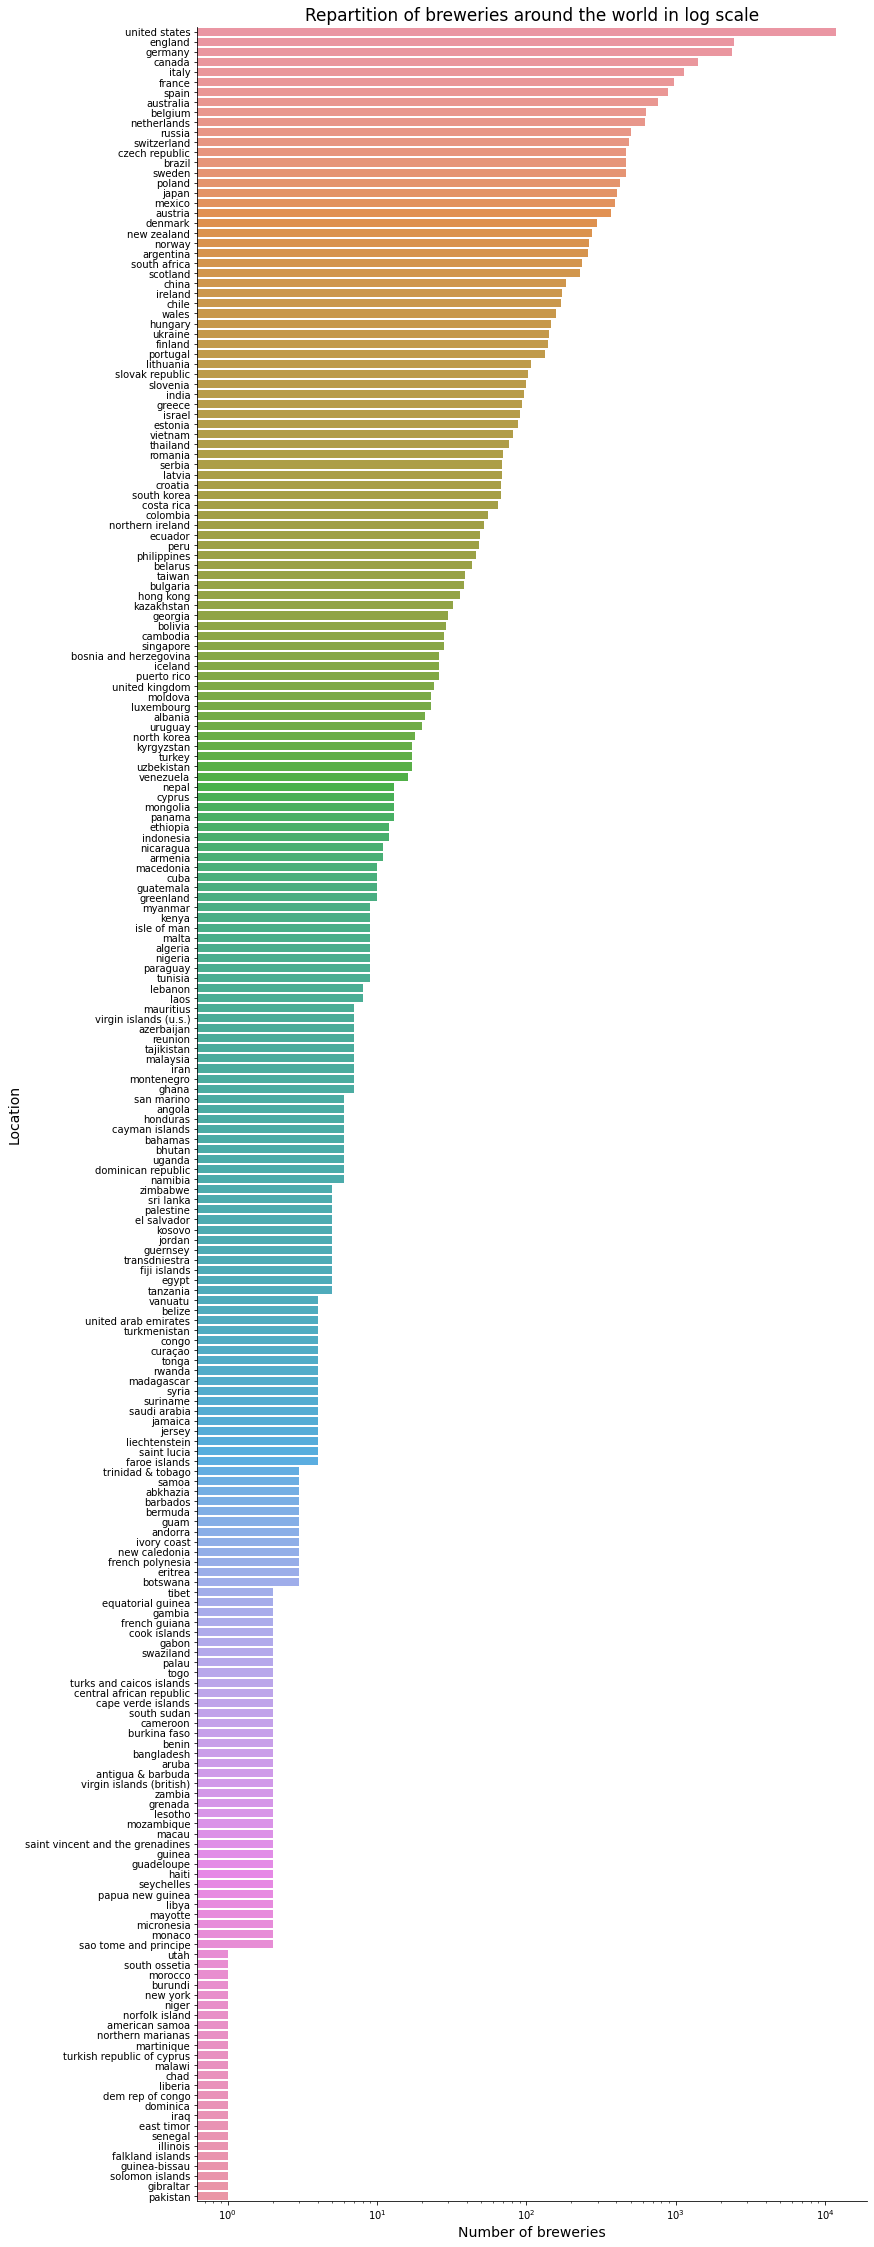

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12,40))

new_breweries = breweries.groupby('location').agg('count').sort_values(by=['id'], ascending=False)

sns.barplot(data=new_breweries, x=new_breweries.id, y=new_breweries.index)
ax.set_title("Repartition of breweries around the world in log scale", fontsize = 17)
ax.set_xlabel("Number of breweries", fontsize = 14)
ax.set_ylabel("Location", fontsize = 14)
ax.set_xscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

- The log space version allows us to see the repartion of breweries in the other countries. In fact, real-world data is often skewed. For heavily skewed distributions, it’s better to define the bins in log space. 
- As we can see here, most of our breweries are from the United States with almost 7000 breweries. This can be explained by the fact that the population in the United States is much bigger than in the other countries. It could be interesting to see the repartition in the United State by states. In this way, it would be possible to match a person from America with a beer thanks to his state.
- We don't have enough data for countries like Pakistant or Estonia. Those countries will be named breweries_few and will be removed from the dataframe breweries_big because it is not representative of the country.

In [23]:
# Brings together countries without enough breweries
tresh_nbr_breweries = 50

locations = []
for location in list(breweries.location.unique()):
    if len(breweries.loc[breweries.location == location]) < tresh_nbr_breweries:
        locations.append(location)

breweries_few = pd.DataFrame(columns = ['id', 'location', 'name', 'nbr_beers', 'state'])
breweries_big = breweries.copy()

for location in locations:
    breweries_few = pd.concat([breweries_few, breweries.loc[breweries.location == location]])
    breweries_big = breweries_big.drop(breweries_big[breweries_big.location == location].index)

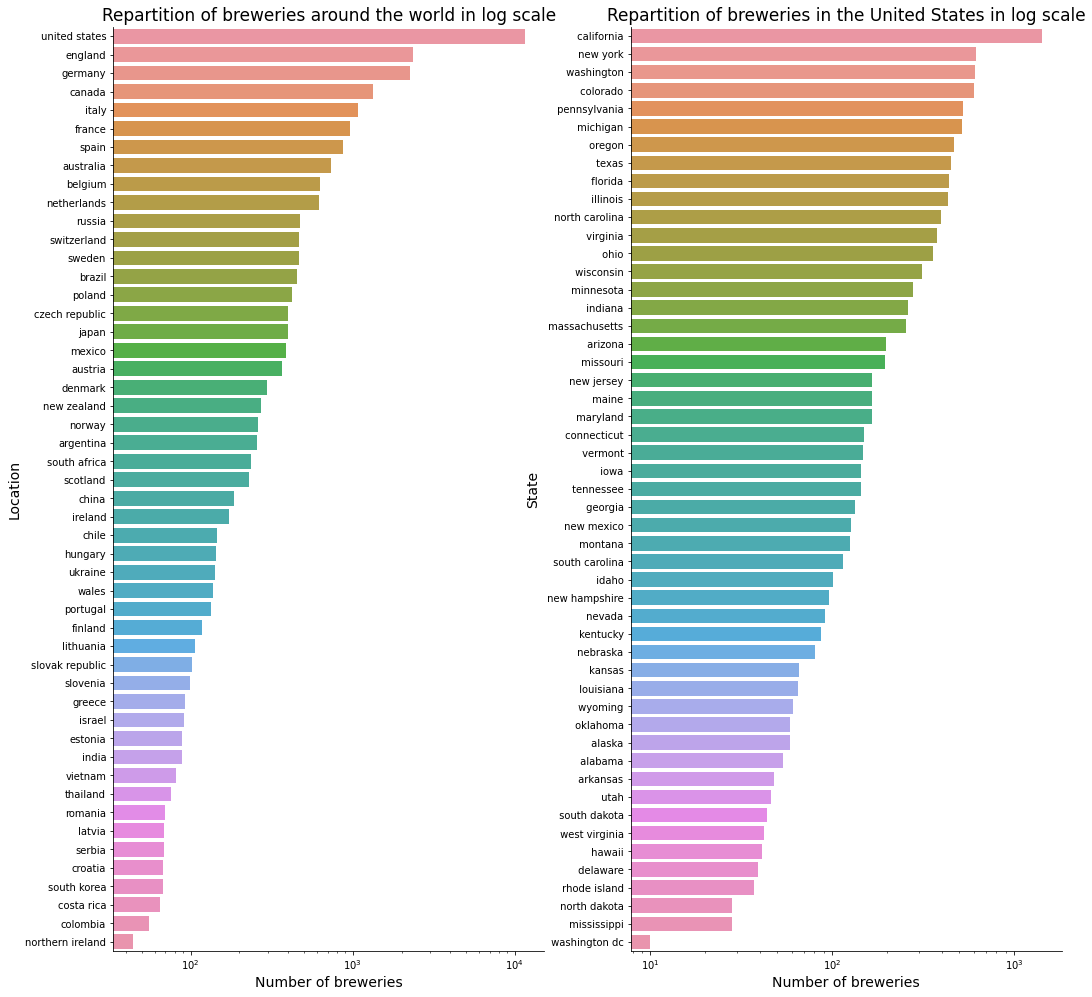

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(17, 17))

new_breweries_big = breweries_big.groupby('location').agg('count').sort_values(by=['id'], ascending=False)
breweries_US = breweries_big[breweries_big['location'] == 'united states']
breweries_US = breweries_US.drop(breweries_US[breweries_US.state == ' united states'].index)
new_breweries_US = breweries_US.groupby('state').agg('count').sort_values(by=['id'], ascending=False)

sns.barplot(data=new_breweries_big, x=new_breweries_big.id, y=new_breweries_big.index, ax=ax[0])
ax[0].set_title("Repartition of breweries around the world in log scale", fontsize = 17)
ax[0].set_xlabel("Number of breweries", fontsize = 14)
ax[0].set_ylabel("Location", fontsize = 14)
ax[0].set_xscale('log')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.barplot(data=new_breweries_US, x=new_breweries_US.id, y=new_breweries_US.index, ax=ax[1])
ax[1].set_title("Repartition of breweries in the United States in log scale", fontsize = 17)
ax[1].set_xlabel("Number of breweries", fontsize = 14)
ax[1].set_ylabel("State", fontsize = 14)
ax[1].set_xscale('log')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

Finally, we had to remove some countries due to too little data. In addition, in order to match a beer with a person, for the case of the United State, it could be interesting to be more precise and to use his state.

## How users are distributed across the world? 

Now that we have a general vision of breweries distribution arounf the world, we can compare it to the users distribution. This will be intersting in the following to see if beers production is corrolated with users productions. We will only visualize 'active' people, that is to say whose number of reviews and grades is greater than a certain threshold.

#### The dataset of users:

In [25]:
BA_users = pd.read_csv(BA_users_file)
BA_users = regularize_locations(BA_users)
print(f'Number of users = {len(BA_users)}')
BA_users.head(10)

Number of users = 153704


,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,state
0,7820,465,nmann08.184925,nmann08,1.199704e+09,united states,washington
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,united states,new york
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,northern ireland,NaN
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,northern ireland,NaN
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,northern ireland,NaN
5,2326,0,hellpop65.48993,Hellpop65,1.131966e+09,united states,kansas
6,3098,0,latarnik.52897,Latarnik,1.133521e+09,united states,new jersey
7,1866,23,rochefortchris.697017,RochefortChris,1.349172e+09,united states,north carolina
8,1131,188,okcnittany.144868,OKCNittany,1.182766e+09,united states,oklahoma
9,9987,16,jaydoc.265507,jaydoc,1.226488e+09,united states,kansas


In [26]:
RB_users = pd.read_csv(RB_users_file)
RB_users = regularize_locations(RB_users)
print(f'Number of users = {len(RB_users)}')
RB_users.head(10)

Number of users = 70174


,nbr_ratings,user_id,user_name,joined,location,state
0,1890,175852,Manslow,1.337508e+09,poland,NaN
1,89,442761,MAGICuenca91,1.484046e+09,spain,NaN
2,169,288889,Sibarh,1.384600e+09,poland,NaN
3,3371,250510,fombe89,1.363950e+09,spain,NaN
4,13043,122778,kevnic2008,1.296644e+09,germany,NaN
5,21024,227834,Beerhunter111,1.352718e+09,germany,NaN
6,8781,83106,Erzengel,1.224324e+09,germany,NaN
7,4051,37316,Lowenbrau,1.147860e+09,spain,NaN
8,435,75452,seynie,1.211278e+09,belgium,NaN
9,5795,17111,Cletus,1.100257e+09,united states,connecticut


In [27]:
# join the two dataframe
users = pd.concat([BA_users, RB_users])
users = users.drop_duplicates(subset=['user_id'], keep='first')

In [28]:
print(f'Number of users = {len(users)}')
print(f'Number of different contries from breweries = {len(list(users.location.unique()))}')

Number of users = 223824
Number of different contries from breweries = 202


#### Repartition of 'active' people

In [29]:
# threshold
tresh_nbr_reviews = 100
tresh_nbr_ratings = 0

In [30]:
active_users = users[(users['nbr_reviews'] > tresh_nbr_reviews) & (users['nbr_ratings'] > tresh_nbr_ratings)]

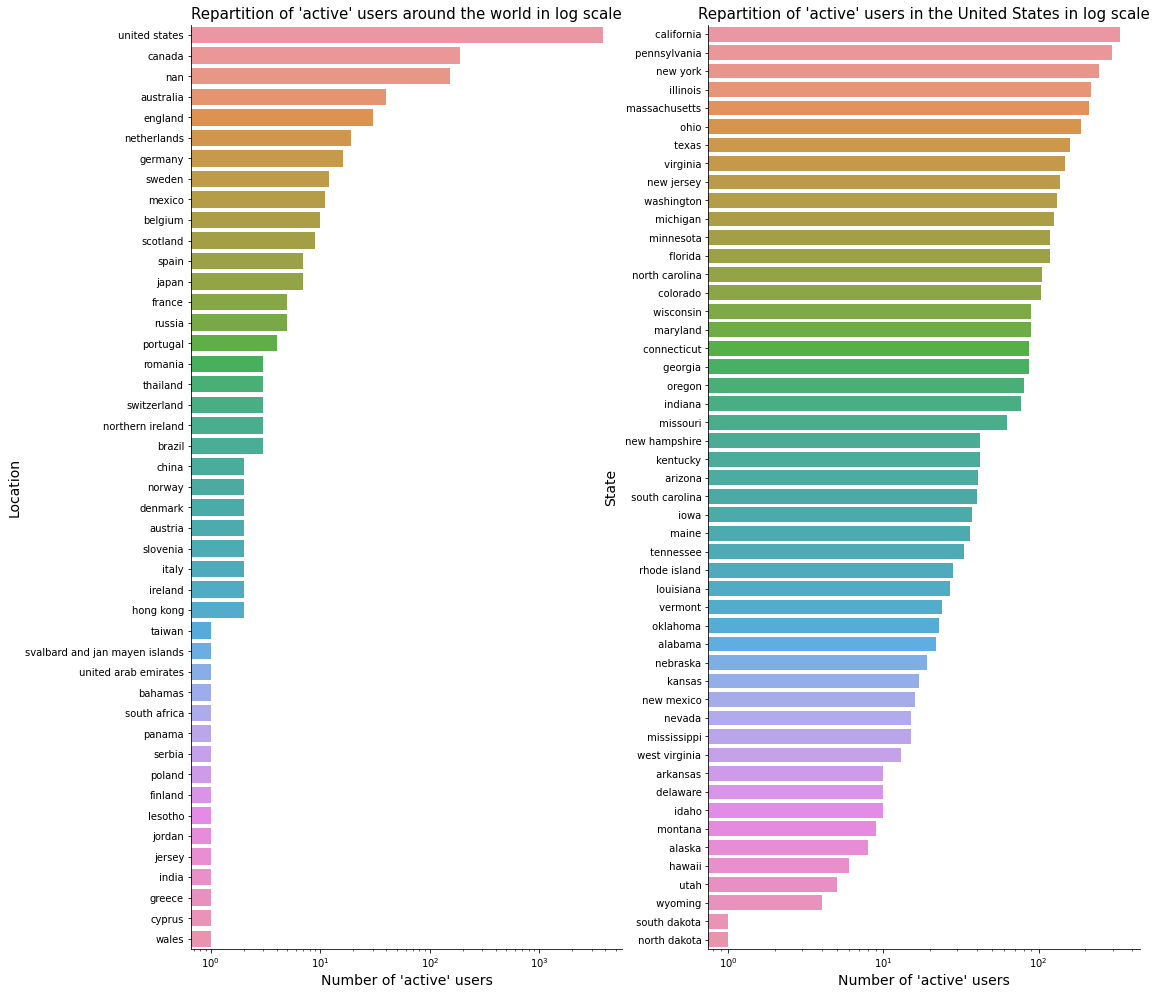

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(17, 17))

new_active_users = active_users.groupby('location').agg('count').sort_values(by=['user_id'], ascending=False)
users_US = active_users[active_users['location'] == 'united states']
new_users_US = users_US.groupby('state').agg('count').sort_values(by=['user_id'], ascending=False)

sns.barplot(data=new_active_users, x=new_active_users.user_id, y=new_active_users.index, ax=ax[0])
ax[0].set_title("Repartition of 'active' users around the world in log scale", fontsize = 15)
ax[0].set_xlabel("Number of 'active' users", fontsize = 14)
ax[0].set_ylabel("Location", fontsize = 14)
ax[0].set_xscale('log')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.barplot(data=new_users_US, x=new_users_US.user_id, y=new_users_US.index, ax=ax[1])
ax[1].set_title("Repartition of 'active' users in the United States in log scale", fontsize = 15)
ax[1].set_xlabel("Number of 'active' users", fontsize = 14)
ax[1].set_ylabel("State", fontsize = 14)
ax[1].set_xscale('log')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

- Here the majority of active users are from the United States and Canada. This seems logic because of the number of the population. In this way it's important to compare it with the distribution of breweries to see if it is corrolated.

- In addition, we can also see that an important part of users didn't precise their nationality. So, we can't use datas from those users to match a person with a beer.

In [32]:
breweries_loc_US = pd.DataFrame(columns = ['id', 'location', 'name', 'nbr_beers', 'state'])

users_US = active_users[active_users['location'] == 'united states']
new_users_US = users_US.groupby('state').agg('count').sort_values(by=['user_id'], ascending=False)

for state in list(new_users_US.index):
    breweries_loc_US = pd.concat([breweries_loc_US, breweries.loc[breweries.state == state]])

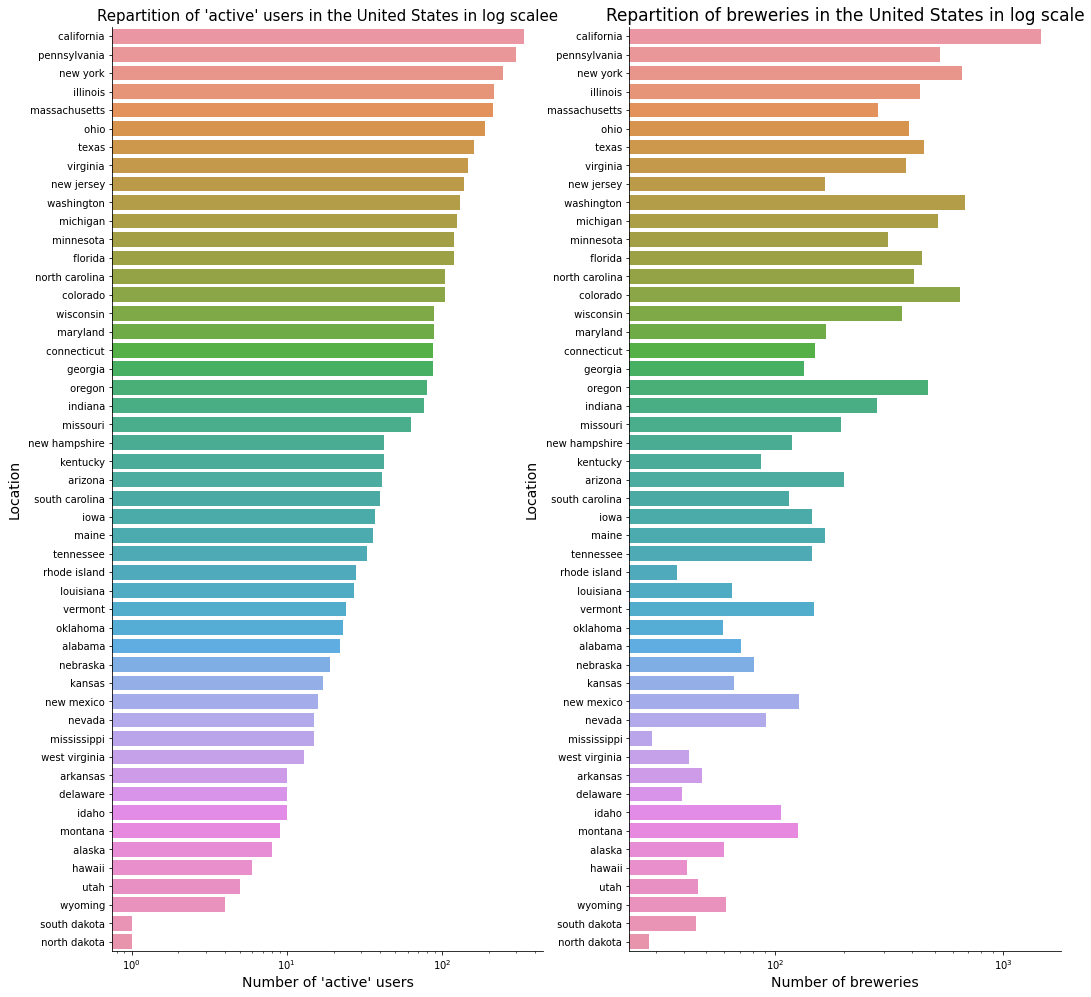

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(17, 17))

new_breweries_loc_US = breweries_loc_US.groupby('state').agg('count')
new_breweries_loc_US['user_id'] = new_users_US.user_id
new_breweries_loc_US = new_breweries_loc_US.sort_values(by=['user_id'], ascending=False)

sns.barplot(data=new_users_US, x=new_users_US.user_id, y=new_users_US.index, ax=ax[0])
ax[0].set_title("Repartition of 'active' users in the United States in log scalee", fontsize = 15)
ax[0].set_xlabel("Number of 'active' users", fontsize = 14)
ax[0].set_ylabel("Location", fontsize = 14)
ax[0].set_xscale('log')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.barplot(data=new_breweries_loc_US, x=new_breweries_loc_US.id, y=new_breweries_loc_US.index, ax=ax[1])
ax[1].set_title("Repartition of breweries in the United States in log scale", fontsize = 17)
ax[1].set_xlabel("Number of breweries", fontsize = 14)
ax[1].set_ylabel("Location", fontsize = 14)
ax[1].set_xscale('log')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [34]:
active_users = active_users.drop(active_users[active_users.location == 'nan'].index, inplace=False)
breweries_loc = pd.DataFrame(columns = ['id', 'location', 'name', 'nbr_beers', 'state'])

new_active_users = active_users.groupby('location').agg('count').sort_values(by=['user_id'], ascending=False)

for loc in list(new_active_users.index):
    breweries_loc = pd.concat([breweries_loc, breweries.loc[breweries.location == loc]])

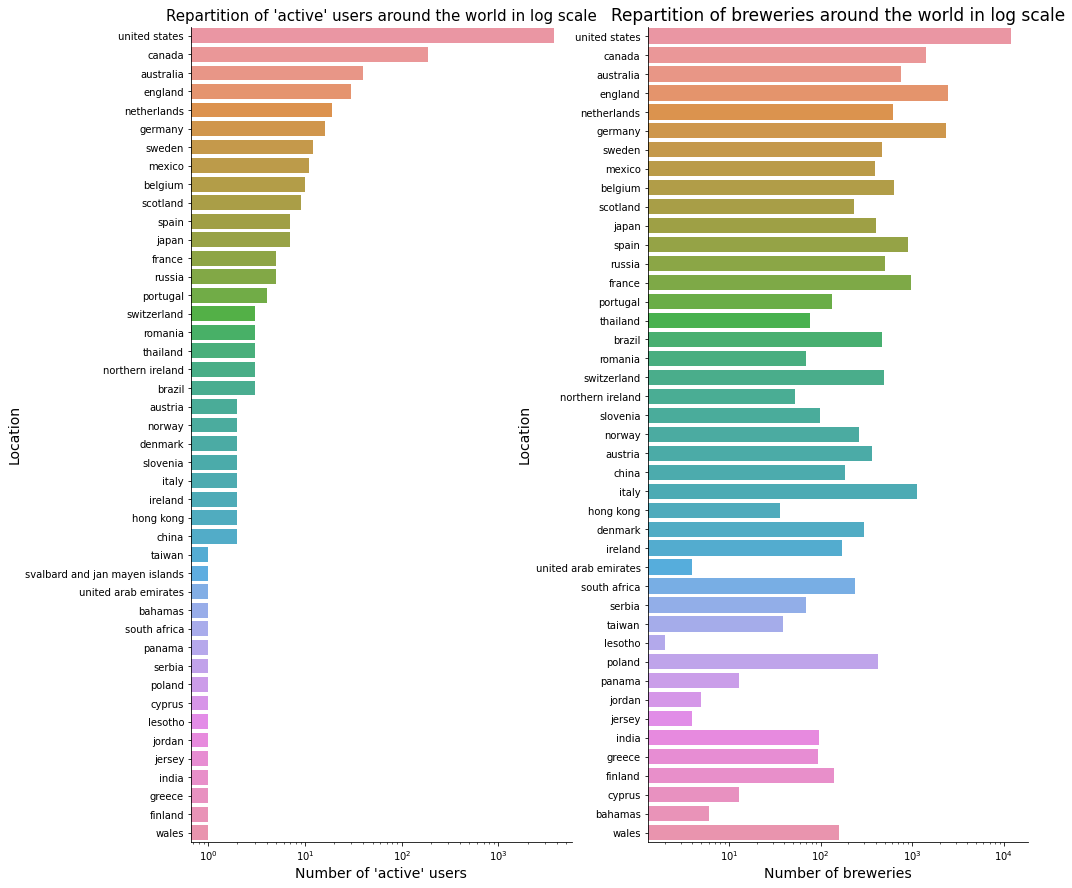

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

new_breweries_loc = breweries_loc.groupby('location').agg('count')
new_breweries_loc['user_id'] = new_active_users.user_id
new_breweries_loc = new_breweries_loc.sort_values(by=['user_id'], ascending=False)

sns.barplot(data=new_active_users, x=new_active_users.user_id, y=new_active_users.index, ax=ax[0])
ax[0].set_title("Repartition of 'active' users around the world in log scale", fontsize = 15)
ax[0].set_xlabel("Number of 'active' users", fontsize = 14)
ax[0].set_ylabel("Location", fontsize = 14)
ax[0].set_xscale('log')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.barplot(data=new_breweries_loc, x=new_breweries_loc.id, y=new_breweries_loc.index, ax=ax[1])
ax[1].set_title("Repartition of breweries around the world in log scale", fontsize = 17)
ax[1].set_xlabel("Number of breweries", fontsize = 14)
ax[1].set_ylabel("Location", fontsize = 14)
ax[1].set_xscale('log')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

It is easy to see here that in our dataset the United States proposes the most beers and has also the most active people. Then it follows with Canada, England and Australia. We can see that the more breweries a country offers, the more active a country is for the first ones. However after Taiwan we can observe that the people are not active when his country proposes more breweries. This can be explained by the fact that we don't have enough datas for those countries and so by population size.

Another factor may be that the country certainly offers a lot of breweries but little choice in the brewery.

#### Repartition of beers

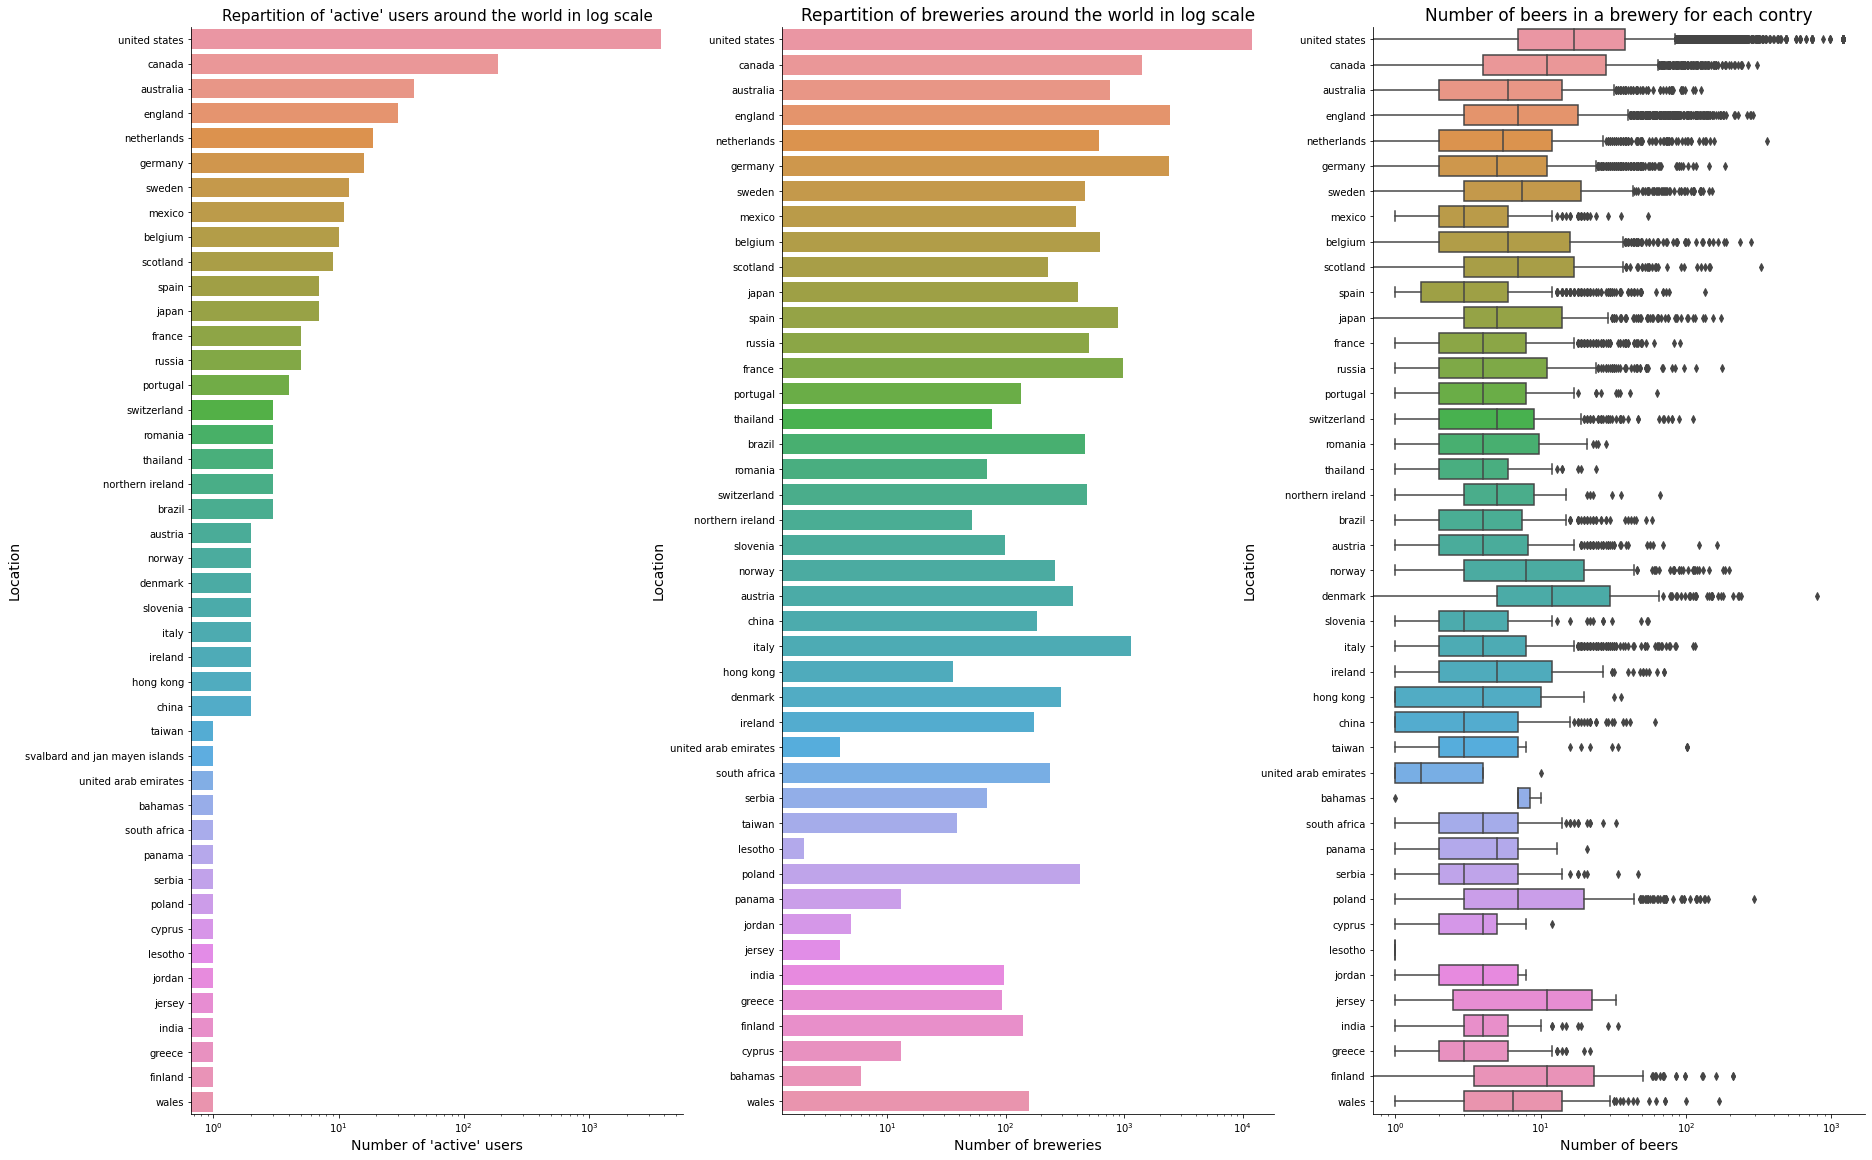

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(30, 20))

new_breweries_loc = breweries_loc.groupby('location').agg('count')
new_breweries_loc['user_id'] = new_active_users.user_id
new_breweries_loc = new_breweries_loc.sort_values(by=['user_id'], ascending=False)

sns.barplot(data=new_active_users, x=new_active_users.user_id, y=new_active_users.index, ax=ax[0])
ax[0].set_title("Repartition of 'active' users around the world in log scale", fontsize = 15)
ax[0].set_xlabel("Number of 'active' users", fontsize = 14)
ax[0].set_ylabel("Location", fontsize = 14)
ax[0].set_xscale('log')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.barplot(data=new_breweries_loc, x=new_breweries_loc.id, y=new_breweries_loc.index, ax=ax[1])
ax[1].set_title("Repartition of breweries around the world in log scale", fontsize = 17)
ax[1].set_xlabel("Number of breweries", fontsize = 14)
ax[1].set_ylabel("Location", fontsize = 14)
ax[1].set_xscale('log')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

sns.boxplot(x="nbr_beers", y="location", data=breweries_loc, ax=ax[2])
ax[2].set_title("Number of beers in a brewery for each contry", fontsize = 17)
ax[2].set_xlabel("Number of beers", fontsize = 14)
ax[2].set_ylabel("Location", fontsize = 14)
ax[2].set_xscale('log')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

We can observe that, in addition to be the countries which have the more breweries, the United States and Canada are countries with the most choice of beers in a brewery.

In general when a country offers many breweries, the choice in the breweries is also more important.

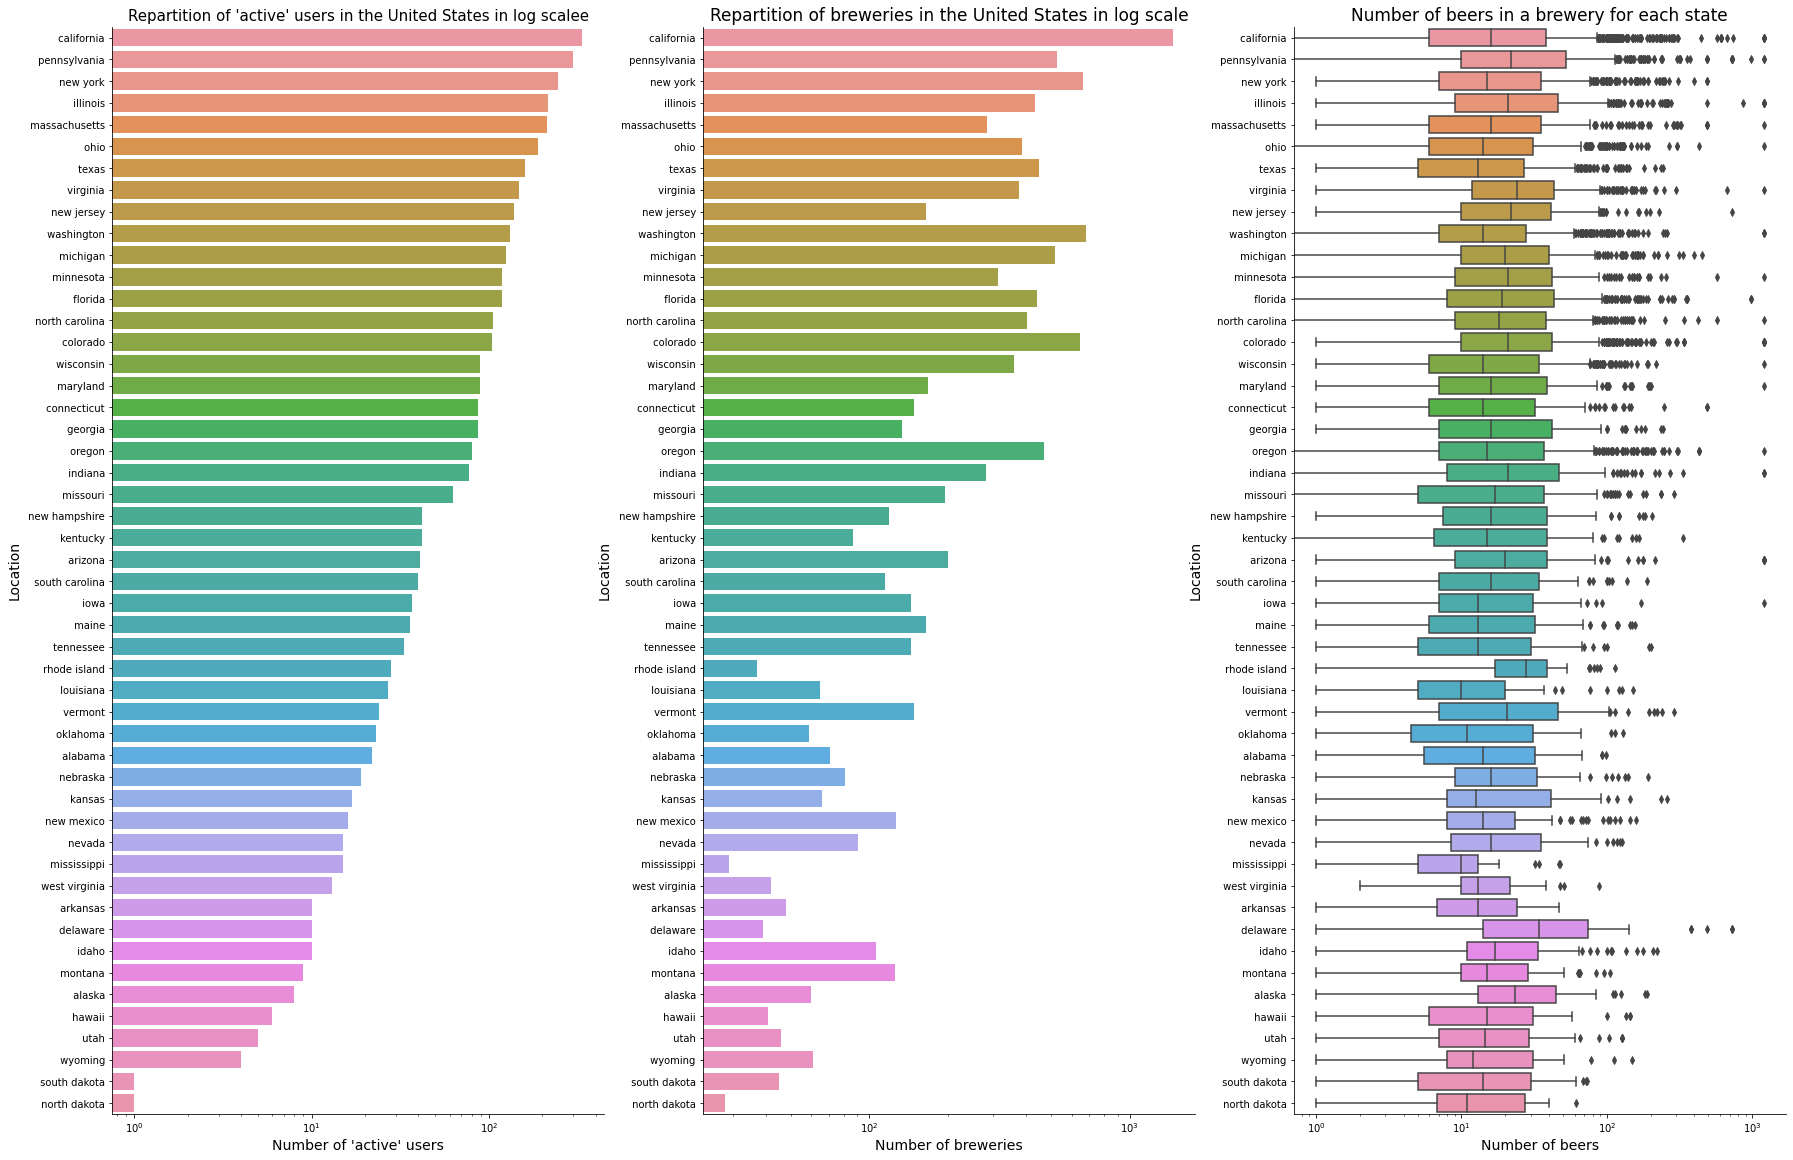

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(30, 20))

new_breweries_loc_US = breweries_loc_US.groupby('state').agg('count')
new_breweries_loc_US['user_id'] = new_users_US.user_id
new_breweries_loc_US = new_breweries_loc_US.sort_values(by=['user_id'], ascending=False)

sns.barplot(data=new_users_US, x=new_users_US.user_id, y=new_users_US.index, ax=ax[0])
ax[0].set_title("Repartition of 'active' users in the United States in log scalee", fontsize = 15)
ax[0].set_xlabel("Number of 'active' users", fontsize = 14)
ax[0].set_ylabel("Location", fontsize = 14)
ax[0].set_xscale('log')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.barplot(data=new_breweries_loc_US, x=new_breweries_loc_US.id, y=new_breweries_loc_US.index, ax=ax[1])
ax[1].set_title("Repartition of breweries in the United States in log scale", fontsize = 17)
ax[1].set_xlabel("Number of breweries", fontsize = 14)
ax[1].set_ylabel("Location", fontsize = 14)
ax[1].set_xscale('log')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

sns.boxplot(x="nbr_beers", y="state", data=breweries_loc_US, ax=ax[2])
ax[2].set_title("Number of beers in a brewery for each state", fontsize = 17)
ax[2].set_xlabel("Number of beers", fontsize = 14)
ax[2].set_ylabel("Location", fontsize = 14)
ax[2].set_xscale('log')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

There are no main differences between the different states of America. In fact, the number of beers proposes in breweries in each states is approximatly the same. For all the breweries the number can vary from 1 beer to 100 beers.

#### Conclusion

Finally, the logic would be that the more a country offers breweries, the more the people in the country will be 'active' but this is not always the case. This may be due to our data sources, as we do not have enough information on certain countries. Or by the choice of beers in each brehwery. In fact, maybe a country offers many breweries but not lot of beers. This means that people in this country don't drink many beers and so, are not as 'active' as expected. However we saw that the choice in a brewery in a country will be more important if the country offers more beers.

To continue, another idea, which will be talked in the next part, would be that a person can be subject to biases. Indeed, a person will more easily appreciate the beers of his region or the beers offered in his region in addition to be more active. In fact, we already saw that the number of breweries and beers in a contry is kind of corrolated to the activity of users.

In the following, we have to keep in mind that most of our datas are from the United States

# 2. Analysis of user preferences

## Relationship between user's country and beer origin

Let's have a look at possible indicators that may suggest correlations between the users country and the beers they review and prefer. 

#### In the following we will use the same datasets and function to read them as the section before

#### The dataset of reviews:

In [38]:
# dataframe from BeerAdvocate
BA_reviews = pd.read_json('./parse_reviews/part_2_BeerAdvocate.json.zip')
print(f'number of reviews = {len(BA_reviews)}')
BA_reviews.head(1)

number of reviews = 2589586


,beer_id,brewery_id,style,user_id,rating
0,142544,37262,Euro Pale Lager,nmann08.184925,2.88


In [41]:
# dataframe from RateBeer
RB_reviews_0 = pd.read_json('./parse_reviews/0_part_2_RateBeer.json.zip')
RB_reviews_1 = pd.read_json('./parse_reviews/1_part_2_RateBeer.json.zip')
RB_reviews_2 = pd.read_json('./parse_reviews/2_part_2_RateBeer.json.zip')
RB_reviews_3 = pd.read_json('./parse_reviews/3_part_2_RateBeer.json.zip')
RB_reviews = pd.concat([RB_reviews_0, RB_reviews_1, RB_reviews_2, RB_reviews_3])
RB_reviews = RB_reviews.drop_duplicates(subset=['beer_id', 'user_id'], keep='first')
print(f'number of reviews = {len(RB_reviews)}')
RB_reviews.head(1)

number of reviews = 7121990


,beer_id,brewery_id,style,user_id,rating
0,410549.0,3198.0,Pale Lager,175852.0,2.0


In [42]:
# join the two dataframe
reviews = pd.concat([BA_reviews, RB_reviews])
reviews = reviews.drop_duplicates(subset=['beer_id', 'user_id'], keep='first')
print(f'number of reviews = {len(reviews)}')
reviews.head(1)

number of reviews = 9711576


,beer_id,brewery_id,style,user_id,rating
0,142544.0,37262.0,Euro Pale Lager,nmann08.184925,2.88


#### The dataset of users:

In [43]:
# remove users which location is not specified
users = users.drop(users[users.location == 'nan'].index, inplace=False)
print(f'Number of users = {len(users)}')
users.head(1)

Number of users = 148989


,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,state
0,7820,465.0,nmann08.184925,nmann08,1.199704e+09,united states,washington


In [44]:
users_country_list = list(users.location.unique())
print(f'Number of different contries form users = {len(users_country_list)}')

Number of different contries form users = 190


Storing the users' origin in a dictionary

In [45]:
users_contry_dict = dict(zip(users.user_id, users.location))

#### The dataset of breweries:

In [46]:
print(f'Number of breweries = {len(breweries)}')
breweries.head(1)

Number of breweries = 32587


,id,location,name,nbr_beers,state
0,39912,kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,NaN


In [47]:
print(f'Number of different contries from breweries = {len(list(breweries.location.unique()))}')

Number of different contries from breweries = 216


Storing the breweries' origin in a dictionary

In [48]:
breweries_contry_dict = dict(zip(breweries.id, breweries.location))

#### Combining reviews, users and breweries:

For each review, we will check if the origin of the user (reviewer) is the same as the brewery (whose beer is being reviewed), marking it with a `1` if the contries match and `0` otherwise.

Merging users and breweries origin (filtering out cases where location in unknown):

In [49]:
def get_country(id, correspondance_dict):
    if id in correspondance_dict:
        return correspondance_dict[id]
    else:
        return np.nan

In [50]:
reviews.head(1)

,beer_id,brewery_id,style,user_id,rating
0,142544.0,37262.0,Euro Pale Lager,nmann08.184925,2.88


In [51]:
reviews['user_country'] = reviews['user_id'].apply(
    lambda x: get_country(id=x, correspondance_dict=users_contry_dict)
)
reviews['brewery_country'] = reviews['brewery_id'].apply(
    lambda x: get_country(id=x, correspondance_dict=breweries_contry_dict)
)
reviews = reviews.dropna()

Creating a column to store if country is the same:

In [54]:
def is_contry_the_same(contry1, country2):
    if contry1==country2: 
        return 1
    else:
        return 0

In [55]:
reviews['is_same_country'] = reviews.apply(lambda row: is_contry_the_same(row.user_country, row.brewery_country), axis=1)

To check if the difference in origin between the user and beer is statistically significant across reviews, we will compute the 95% confidence intervals (using `scipy.stats`) of the generated column `is_same_country`:

In [56]:
def get_confidence_interval(data, title=None):
    interval = st.t.interval(alpha=0.95,
                df=len(data)-1,
                loc=np.mean(data), 
                scale=st.sem(data))
    print('--------------------------')
    if title:
        print(title)
    print()
    print(f'''Average = {np.mean(data)}
Confidence interval = {interval}''')
    print('--------------------------')
    return interval

In [57]:
interval = get_confidence_interval(list(reviews.is_same_country), "Comparison between user and beer origin from all reviews:")

--------------------------
Comparison between user and beer origin from all reviews:

Average = 0.5132158633816042
Confidence interval = (0.5128819354040318, 0.5135497913591766)
--------------------------


This result indicates that, for all reviews, the country of the user (reviewer) tend to be the same as the beer being reviewed with more than 0.5 as an average. In this way, the user will have more probability to make reviews on beers which origin is his origin. In fact, we have to take into account that there are many more countries which are not this person's country so the probability of any given country being one's (unique) contry of origin should be very low.

What we want to investigate further here is the user's *preference* as a function of country, which can be hidden inside the gross number of reviews. 

#### Metrics to capture user's preference

Some initial ideas to capture the users preferences are related to analyzing what are the styles and countries of origin of each person's most frequent reviews, as well as the individual's best rated reviews. 

This type of analysis can be done with the following function, which we intend to develop and build upon in the third phase of the project:

In [58]:
def get_user_preferences_df(reviews, number_of_reviews_threshold=10):
    grouped = reviews.groupby('user_id')
    data = []
    for user_id, group in grouped:
        if len(group) >= number_of_reviews_threshold:
            row_dict = {}
            row_dict['user_id'] = user_id
            row_dict['user_country'] = users_contry_dict[user_id]

            most_frequent_style = group['style'].value_counts().idxmax()
            row_dict['most_frequent_style'] = most_frequent_style

            most_frequent_country = group['brewery_country'].value_counts().idxmax()
            row_dict['most_frequent_country'] = most_frequent_country

            highest_rated_index = group['rating'].idxmax()
            highest_rated_beer = reviews.loc[highest_rated_index]
            highest_rated_beer = highest_rated_beer[~highest_rated_beer.index.duplicated(keep="first")].squeeze()
            row_dict['highest_rating'] = highest_rated_beer.rating
            row_dict['highest_rated_origin'] = highest_rated_beer.brewery_country

            row_dict['is_country_same_as_highest_rated'] = 1 if highest_rated_beer.brewery_country == users_contry_dict[user_id] else 0
            row_dict['is_country_same_as_most_frequent'] = 1 if most_frequent_country == users_contry_dict[user_id] else 0

            avg_rating_per_style = group.groupby(['style'])['rating'].mean().to_dict()
            row_dict['highest_rated_style'] = max(avg_rating_per_style, key=avg_rating_per_style.get)
            row_dict['lowest_rated_style'] = min(avg_rating_per_style, key=avg_rating_per_style.get)

            # row_dict['favorite_beers_avg_rating'] = group[group['style'] == most_frequent_style]['rating'].mean()
            # row_dict['other_beers_avg_rating'] = group[group['style'] != most_frequent_style]['rating'].mean()

            data.append(row_dict)
    return pd.DataFrame(data)

In order to have a solid grasp of each individuals preferences, we decided to consider individuals with at the number of least $n$ different ratings. Although this can reduce the number of instances in our analysis, it makes the estimation of the user's preferences more robust.

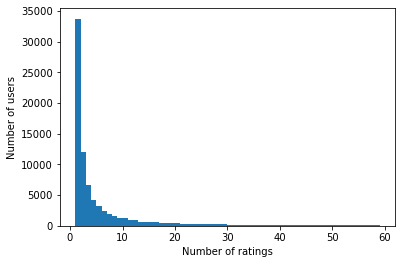

In [59]:
fig = plt.figure().set_size_inches(6,4)
number_of_reviews = reviews.value_counts('user_id').values
bins = np.arange(1, 60, 1)
plt.ylabel('Number of users')
plt.xlabel('Number of ratings')
plt.hist(number_of_reviews, bins=bins)
plt.show()

In [60]:
number_of_reviews

array([43250, 39239, 32658, ...,     1,     1,     1], dtype=int64)

Here, we would like compare how the most reviewed country for each individual and the origin of her/his highest rated beer relates to its own country. For this reason, we compute the average values and confidence intervals for both the `is_country_same_as_highest_rated` and `is_country_same_as_most_frequent` fields generated below.

In [61]:
user_prefs_df = get_user_preferences_df(reviews)

In [62]:
user_prefs_df.head(1)

,user_id,user_country,most_frequent_style,most_frequent_country,highest_rating,highest_rated_origin,is_country_same_as_highest_rated,is_country_same_as_most_frequent,highest_rated_style,lowest_rated_style
0,2.0,united states,Premium Bitter/ESB,united states,3.98,united states,1,1,Dry Stout,Witbier


In [63]:
interval = get_confidence_interval(list(user_prefs_df.is_country_same_as_most_frequent), "Comparison between user and beer origin for most frequent beer country:")

--------------------------
Comparison between user and beer origin for most frequent beer country:

Average = 0.8230344882327261
Confidence interval = (0.8183219326068005, 0.8277470438586516)
--------------------------


In [64]:
interval = get_confidence_interval(list(user_prefs_df.is_country_same_as_highest_rated), "Comparison between user and beer origin for highest rated review:")

--------------------------
Comparison between user and beer origin for highest rated review:

Average = 0.5888399412628488
Confidence interval = (0.5827640884528333, 0.5949157940728642)
--------------------------


As it can be observed in this preliminary analysis, the average value of the most frequent beer country is higher than the country of the highest reviews for each individual. This can point to a be subtle trend for the users reviewing on average more beers from their own country, but not necessarly having these beers as their favorite (they can be from a different country).

Improved versions of these type of analysis are planned to be made in the third part of the project, accounting for all ratings from both beer reviews websites. Among other things, further care will be taken to analysis cases where 
inherant imbalances in the dataset between beers and reviews may affect the final results and conclusions 

#### Illustrative analysis

Beyond computing metrics, we plan to make visualizations of the prefered beers across styles and countries around the world, in a way that may support our insights from the data generated. Illustrative analysis relate the user's country of origin, brewery's country of origin and beer style as follows:

In [65]:
def get_beer_style_matrix(df, category, n_most_frequent=15):
    new_df = df[['user_country', category]].copy()
    most_frequent_countries = list(new_df['user_country'].value_counts()[:n_most_frequent].keys())
    most_frequent_styles = list(new_df[category].value_counts()[:n_most_frequent].keys())

    new_df.user_country = new_df.user_country.astype("category")
    new_df.user_country = new_df.user_country.cat.set_categories(most_frequent_countries)
    new_df.sort_values(['user_country'])
    
    new_df[category] = new_df[category].astype("category")
    new_df[category] = new_df[category].cat.set_categories(most_frequent_styles)
    new_df.sort_values([category])

    new_df = new_df[new_df['user_country'].isin(most_frequent_countries)]
    new_df = new_df[new_df[category].isin(most_frequent_styles)]
    new_df['count'] = 1
    new_df = pd.pivot_table(new_df, values=['count'], index=['user_country'],
                        columns=[category], aggfunc=np.sum, fill_value=0)
    return new_df['count'], n_most_frequent

Text(0.5, 1.0, "Normalize beer preferences across countries:\nuser's country $\\times$ its most frequent style of beer\n(only shown for top 15 countries and styles)")

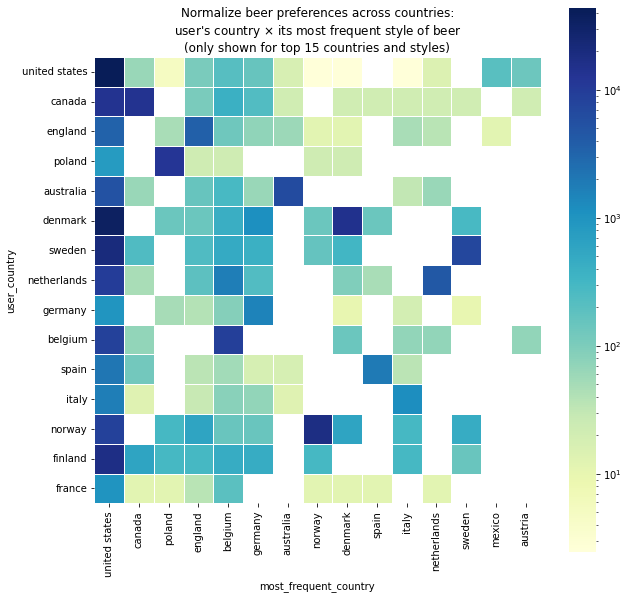

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

most_frequent_df, n_most_frequent = get_beer_style_matrix(
    df=user_prefs_df,
    category='most_frequent_country'
)
population=pd.DataFrame({'location':[location for location in most_frequent_df.index],
                  'population': [population_dict[location] if location in population_dict else 0 for location in most_frequent_df.index]})
population.population = [pop/sum(list(population.population)) for pop in list(population.population)]
population = population.set_index('location')

new_most_frequent_df = most_frequent_df.head(0)
for index, row in most_frequent_df.iterrows():
    new_most_frequent_df = pd.concat([new_most_frequent_df, most_frequent_df.loc[most_frequent_df.index == index, :]/float(population.loc[population.index == index, 'population'])])

new_most_frequent_df = new_most_frequent_df.dropna()
sns.heatmap(new_most_frequent_df, cmap="YlGnBu", linewidths=.6, square=True, norm=LogNorm())

plt.title(f'''Normalize beer preferences across countries:
user's country $\\times$ its most frequent style of beer
(only shown for top {n_most_frequent} countries and styles)''')

Here we plot only for countries which made the most reviewed.

We can notice that for mojority of countries, the beers on which the users made the most reviews correspond to beers from breweries initially in the United States. Indeed, this can be explained by the analysis of the first part where we observed that most of our data came from the United States, in particular the number of breweries. Thus it is more likely that the user notes beers from breweries in the United States.

However, we can also notice that after removing the case of the United States, the most commented beers for the majority of countries come from the breweries from the same countries. This seems logical because individuals will more easily reviewd beers that come from their home. 

Now, it could be interesting to have a visualisation on the origin of the highest rated beers for each country. In fact, maybe people review more beers from their country but those beers are not their favorites.

Text(0.5, 1.0, "Normalize beer preferences across countries:\nuser's country $\\times$ its most frequent style of beer\n(only shown for top 15 countries and styles)")

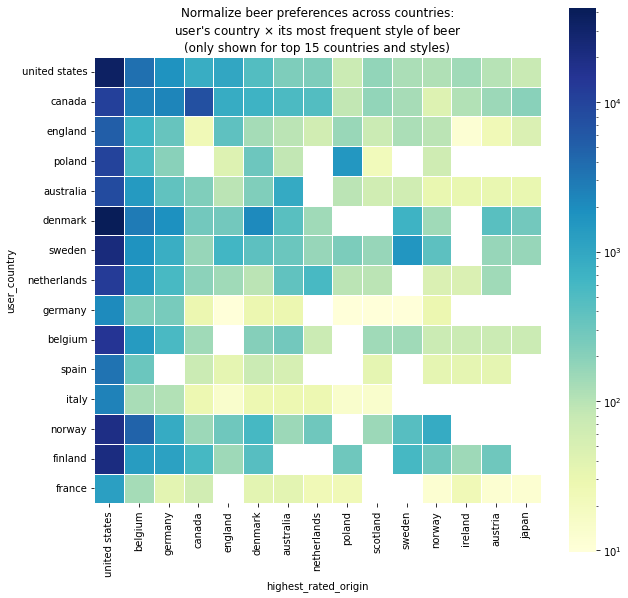

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

most_frequent_df, n_most_frequent = get_beer_style_matrix(
    df=user_prefs_df,
    category='highest_rated_origin'
)
population=pd.DataFrame({'location':[location for location in most_frequent_df.index],
                  'population': [population_dict[location] if location in population_dict else 0 for location in most_frequent_df.index]})
population.population = [pop/sum(list(population.population)) for pop in list(population.population)]
population = population.set_index('location')

new_most_frequent_df = most_frequent_df.head(0)
for index, row in most_frequent_df.iterrows():
    new_most_frequent_df = pd.concat([new_most_frequent_df, most_frequent_df.loc[most_frequent_df.index == index, :]/float(population.loc[population.index == index, 'population'])])

new_most_frequent_df = new_most_frequent_df.dropna()
sns.heatmap(new_most_frequent_df, cmap="YlGnBu", linewidths=.6, square=True, norm=LogNorm())

plt.title(f'''Normalize beer preferences across countries:
user's country $\\times$ its most frequent style of beer
(only shown for top {n_most_frequent} countries and styles)''')

Thus, here it is visible that the origins of the preferred beers are the United States, which can be explained again by the number of data, and Belgium. But here there is not necessarily more data on Belgium as seen in part 1. The beers of this country are therefore the globally preferred beers.

In this way, users review more beers from their own country, but not necessarly having these beers as their favorite

However, we can still observe even if it is less visible that individuals have a tendency to prefer beers from their country because squares matching the same countries on the rows and on the columns are more blue than the ones near them.

Now that we have seen that people tend to review and prefer beers from their countries, we can do a visualization to see for each country which style of beer, it population did the most reviws and prefered.

Text(0.5, 1.0, "Normalize beer preferences across countries:\nuser's country $\\times$ its most frequent style of beer\n(only shown for top 15 countries and styles)")

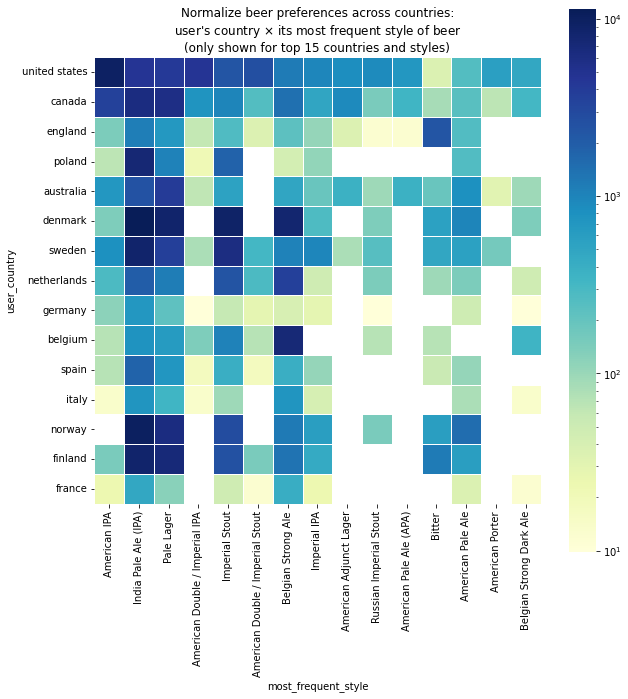

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

most_frequent_df, n_most_frequent = get_beer_style_matrix(
    df=user_prefs_df,
    category='most_frequent_style'
)
population=pd.DataFrame({'location':[location for location in most_frequent_df.index],
                  'population': [population_dict[location] if location in population_dict else 0 for location in most_frequent_df.index]})
population.population = [pop/sum(list(population.population)) for pop in list(population.population)]
population = population.set_index('location')

new_most_frequent_df = most_frequent_df.head(0)
for index, row in most_frequent_df.iterrows():
    new_most_frequent_df = pd.concat([new_most_frequent_df, most_frequent_df.loc[most_frequent_df.index == index, :]/float(population.loc[population.index == index, 'population'])])

new_most_frequent_df = new_most_frequent_df.dropna()
sns.heatmap(new_most_frequent_df, cmap="YlGnBu", linewidths=.6, square=True, norm=LogNorm())

plt.title(f'''Normalize beer preferences across countries:
user's country $\\times$ its most frequent style of beer
(only shown for top {n_most_frequent} countries and styles)''')

Text(0.5, 1.0, "Normalize beer preferences across countries:\nuser's country $\\times$ its most frequent style of beer\n(only shown for top 15 countries and styles)")

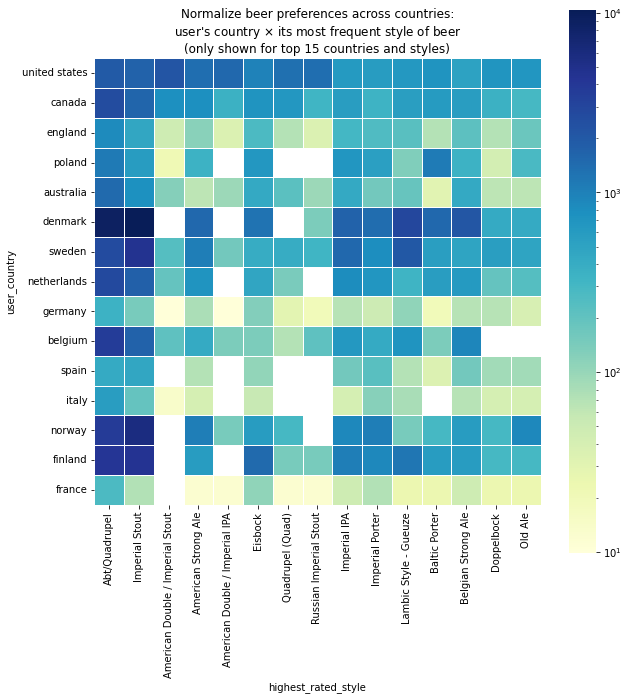

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

most_frequent_df, n_most_frequent = get_beer_style_matrix(
    df=user_prefs_df,
    category='highest_rated_style'
)
population=pd.DataFrame({'location':[location for location in most_frequent_df.index],
                  'population': [population_dict[location] if location in population_dict else 0 for location in most_frequent_df.index]})
population.population = [pop/sum(list(population.population)) for pop in list(population.population)]
population = population.set_index('location')

new_most_frequent_df = most_frequent_df.head(0)
for index, row in most_frequent_df.iterrows():
    new_most_frequent_df = pd.concat([new_most_frequent_df, most_frequent_df.loc[most_frequent_df.index == index, :]/float(population.loc[population.index == index, 'population'])])

new_most_frequent_df = new_most_frequent_df.dropna()
sns.heatmap(new_most_frequent_df, cmap="YlGnBu", linewidths=.6, square=True, norm=LogNorm())

plt.title(f'''Normalize beer preferences across countries:
user's country $\\times$ its most frequent style of beer
(only shown for top {n_most_frequent} countries and styles)''')

## Analysis of the textual reviews: sentiment estimation 

The datasets of reviews from both platforms (BeerAdvocate and RateBeer) provide a textual description of the beer given by the user as rating it. In similar light of what has been done in previous exercises and homeworks, we would like to perform a sentiment analysis of the textual data provided in the reviews, and compared it with the ratings itself. This enable us to investigate how much the user's final rating is in accordance/correlated to her/his testimony, and also estimate the applicability/effectiveness of the straighfoward approach of stablish a sentiment score based on the number of positive and negative words the user employs in its review.

In this analysis, we narrow the reviews considering only the ones coming from users in the United States. As previously seen, this is the country with the most active users and widest variety of (local) beers. Furthermore, the language of the reviews being english facilitates the process of sentiment analysis employed here.

In order to parse the textual data of all relevant reviews, we employ a function constructure in the python code of the file `get_sentiment_count.py` (this is done outside this jupyter notebook for technical reasons). There we loop through all the reviews and filter for the ones coming from users from the U.S. only. The textual data of each review is then parsed, and passed to functions that count the number of positive and negative words. Aditionally, we also get the information of whether the beer being reviewed originally comes from the same country as the user, as it will be further discussed. The important snippets of these methods are also provided below:

In [70]:
import pandas as pd
import numpy as np
import requests
import string
import json

positive_words = set(requests.get('https://ptrckprry.com/course/ssd/data/positive-words.txt').text.split('\n')[35:])
negative_words = set(requests.get('https://ptrckprry.com/course/ssd/data/negative-words.txt').text.split('\n')[35:])
punctuation_toberemoved = string.punctuation.translate({ord(i) : None for i in '+-'})

def sentiment_count(sentence, type):
    words = list(sentence.lower().translate(str.maketrans('', '', punctuation_toberemoved)).split(' '))
    if type == 'positive':
        return len([w for w in words if w in positive_words])
    elif type == 'negative':
        return len([w for w in words if w in negative_words])

def get_rating_text_with_list_of_dicts(file_path:str, user_list:set, breweries_list:set):
    rating = None
    text = ''
    user_in_list = False
    same_country = 0
    reviews_list = []
    with open(file_path, 'r', encoding="utf8") as r_file:
        for line in r_file:
            if line.split(':')[0] == 'user_id':
                if line.split(':')[1].strip() in user_list:
                    user_in_list = True
                    continue
            if line.split(':')[0] == 'brewery_id':
                if line.split(':')[1].strip() in breweries_list:
                    same_country = 1
                    continue
            if line.split(':')[0] == 'rating':
                rating = line.split(':')[1].strip()
                continue
            elif line.split(':')[0] == 'text':
                text = line.split(':')[1].strip()
                continue
            elif line == '\n':
                if rating and text and user_in_list:
                    d = {
                        'positive': sentiment_count(sentence=text, type='positive'),
                        'negative': sentiment_count(sentence=text, type='negative'),
                        'rating':rating,
                        'same_country': same_country
                    }
                    reviews_list.append(d)
                rating = None
                text = ''
                user_in_list = False
                same_country = 0
    return reviews_list

the result is then dumped into zipped json files located in `./datasets/sentiment_analysis` that can be directly loaded into a DataFrame:

In [71]:
import pandas as pd

In [72]:
BA_sentiment_count_df = pd.read_json('./datasets/sentiment_analysis/us_sentiment_count_BeerAdvocate.json.zip')
RB_sentiment_count_df = pd.read_json('./datasets/sentiment_analysis/us_sentiment_count_RateBeer.json.zip')

The number of analysed textual reviews is:

In [73]:
print(f'BeerAdvocate: {len(BA_sentiment_count_df):,}')
print(f'RateBeer: {len(RB_sentiment_count_df):,}')
sa_df = pd.concat([BA_sentiment_count_df, RB_sentiment_count_df])
print(f'Total number of reviews: {len(sa_df):,}')

BeerAdvocate: 2,241,309
RateBeer: 3,107,147
Total number of reviews: 5,348,456


In [74]:
sa_df.head(2)

,positive,negative,rating,same_country
0,5,9,2.88,0
1,2,2,3.67,0


### How strong is the final rating correlated with the positive/negative wordcount?

Let's do relative statistical t-tests to verify that:

In [75]:
from scipy.stats import ttest_rel

def run_ttest(df, word_type):
    statistic, pvalue = ttest_rel(
        a=df[word_type],
        b=df.rating
    )
    print('--------------------\n')
    print(f'type: {word_type} words')
    print(f't-statistic: {statistic}')
    print(f'p-value = {pvalue}')
    print()

In [76]:
for word_type in ['positive', 'negative']:
    run_ttest(df=sa_df, word_type=word_type)

--------------------

type: positive words
t-statistic: 798.5851206010806
p-value = 0.0

--------------------

type: negative words
t-statistic: -253.65841213607965
p-value = 0.0



Here we can see a very strong correlation between the use of both positive words (positive correlation) and negative words (negative corrlations) on the final numeric rating given in each review. This is given by the high magnitude (both positive and negative) given by the computed t-statistic of both tests, acoompanied by a p-value which is lower than 0.0005.

In order to estimate the average mutual-influence on the words usage and final numeric rating, we can use the tools provided by linear regression:

### Analysing the relashionship between words usage and numerical rating with linear regression

In [77]:
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [78]:
mod = smf.ols(formula='rating ~ positive + negative', data=sa_df)

np.random.seed(2)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                 2.128e+05
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:01:08   Log-Likelihood:            -5.3571e+06
No. Observations:             5348456   AIC:                         1.071e+07
Df Residuals:                 5348453   BIC:                         1.071e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4689      0.000   8594.200      0.0

Here, we can see that the beer rating scores have a average baseline of 3.47 (out of five), and that the use of each positive word is correlated with the increase of an average of 0.05 points in the final score. The opposite happens for negative words, where its use is associated with a decrease of 0.05 score points (per word). In all cases, we can observe p-values being smaller than 0.0005

So, we can see that this simple methodology of sentiment analysis on the textual data represents a robust way of quantifying the degree of satisfaction/appreatiation of the user with the beer being reviewed. In this way, we can also anayse the overall sentiment of the textual data of users when rating beers from their own country (U.S.) and beers from other countries.

As mentioned before, in the parsing of the textual data from the reviews file, we have checked whether the beer being reviewed is from the same country as the user, including this information in the column `same_country`, which can store the value of either `1` (beer and user are from the same country) or `0` (not from the same country).

In [79]:
count_dict = dict(sa_df.same_country.value_counts())
for var, t in zip(count_dict.keys(), ['', 'not ']):
    print(f'User and beer {t}from the same country: {count_dict[var]:,} reviews ({(count_dict[var]*100)/len(sa_df):.2f} %)')

User and beer from the same country: 4,232,029 reviews (79.13 %)
User and beer not from the same country: 1,116,427 reviews (20.87 %)


We can therefore include this information in our linear regression analysis:

In [80]:
regressions = [
    'positive ~ same_country',
    'negative ~ same_country',
    'rating ~ positive + negative + same_country'
]
labels = ['A', 'B', 'C']

def run_linregress_exp(regression:str, label:str):
    print(f'************************************************************************')
    print(f'                             REGRESSION {label}')
    print(f'************************************************************************\n')
    mod = smf.ols(formula=regression, data=sa_df)

    np.random.seed(2)
    res = mod.fit()

    print(res.summary())
    print('\n\n')

for r, l in zip(regressions, labels):
    run_linregress_exp(r, l)

************************************************************************
                             REGRESSION A
************************************************************************

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.003
Date:                Sat, 17 Dec 2022   Prob (F-statistic):             0.0143
Time:                        17:01:11   Log-Likelihood:            -1.6632e+07
No. Observations:             5348456   AIC:                         3.326e+07
Df Residuals:                 5348454   BIC:                         3.326e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   co

Interpreting the different regressions individually, we can see that:
- Regression A: the difference in use of positive words for beers that come from the same country or different country as the user is minor: they differ in 0.01 words in average.
- Regression B: the difference in use of negative words is one order of magnitude larger in the previous case: beers from the same country as the user receive an average of 0.2 less negative words than the ones from different countries.
- Regression C: Analysing the effect of these variables on the final rating, the observations on the use of words maintains the same as seen before: each positive (negative) word is related to an increase (decrease) of 0.05 score points on avarage. But stronger than that is the effect of the beer origin: being from the same country of the user is associated with a average increase in 0.11 score points in the final rating. 

So, from these notes, we can infer that beers coming from outside of the United States receive on average 0.2 more negative words in their textual description and a numerical rating on average 0.11 score points lower. 

But, one question that still may arise is *"what if the beer from the U.S. is simply better than the average, and U.S. users are not biased at all?"*.

In order to try to disentagle these observations, let's check the average rating of the beer from the U.S. and the beers from other countries:

In [81]:
df_breweries = pd.concat([
    pd.read_csv('./datasets/BeerAdvocate/breweries.csv'),
    pd.read_csv('./datasets/RateBeer/breweries.csv')
])
df_breweries = regularize_locations(df_breweries)
df_breweries['from_us'] = df_breweries['location'].apply(lambda x: x == 'united states')
brewery_country = dict(zip(df_breweries.id, df_breweries.location))

In [82]:
df_beers = pd.concat([
    pd.read_csv('./datasets/BeerAdvocate/beers.csv'),
    pd.read_csv('./datasets/RateBeer/beers.csv')
])
df_beers['location'] = df_beers['brewery_id'].apply(lambda x: brewery_country[x])
df_beers.head(1)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,overall_score,style_score,location
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0.0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,NaN,NaN,kyrgyzstan


In [83]:
df_beers['is_from_us'] = df_beers['location'].apply(lambda x: x == 'united states')
df_beers.is_from_us.value_counts()

True     369127
False    353777
Name: is_from_us, dtype: int64

In [84]:
print('The average rating of beers from the U.S. and outside the U.S.:')
df_beers.groupby(['is_from_us'])['avg'].mean()

The average rating of beers from the U.S. and outside the U.S.:


is_from_us
False    3.234581
True     3.354537
Name: avg, dtype: float64

Here, we can see that the average rating of beers from the United States is indeed 0.12 score points higher than the group of non-american beers (3.35 against 3.23). However, from the results of previous linear regressions with the ratings from users, we see that beers from the U.S. reviewed by americans receive even higher scores than the global average (3.38 + 0.11 = 3.49 score points).  

# 3. Analysis of beer attributes

The dataset from BeerAdvocate provide ratings for different beer caracteristics, let's have a look at them:

In [93]:
BA_reviews = read_sample_reviews_file(BA_sample_file)
print(f'number of reviews = {len(BA_reviews)}')
BA_reviews.head(1)

number of reviews = 111111


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 12:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with...",True


In [94]:
RB_reviews = read_sample_reviews_file(RB_sample_file)
print(f'number of reviews = {len(RB_reviews)}')
RB_reviews.head(1)

number of reviews = 58


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 12:00:00,Manslow,175852,2.0,4.0,2.0,4.0,8.0,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozł...",True


In [95]:
# join the two dataframe
reviews = pd.concat([BA_reviews, RB_reviews])
reviews = reviews.drop_duplicates(subset=['beer_id', 'user_id'], keep='first')
print(f'number of reviews = {len(reviews)}')
reviews.head(1)

number of reviews = 111169


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 12:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with...",True


In [110]:
reviews['user_country'] = reviews['user_id'].apply(
    lambda x: get_country(id=x, correspondance_dict=users_contry_dict)
)
reviews['brewery_country'] = reviews['brewery_id'].apply(
    lambda x: get_country(id=x, correspondance_dict=breweries_contry_dict)
)
reviews = reviews.dropna()
reviews['is_same_country'] = reviews.apply(lambda row: is_contry_the_same(row.user_country, row.brewery_country), axis=1)

In [130]:
reviews.head(1)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,user_country,brewery_country,is_same_country
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 12:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with...",True,united states,gabon,0


In [111]:
beer_attributes = ['appearance', 'aroma', 'palate', 'taste']
for att in beer_attributes + ['overall', 'rating']:
    reviews[att] = reviews[att].astype(float)
reviews = reviews.dropna()
beer_attributes_df = reviews[beer_attributes]
beer_attributes_df.describe()

,appearance,aroma,palate,taste
count,58716.000000,58716.000000,58716.000000,58716.000000
mean,3.867617,3.790040,3.775321,3.839316
std,0.536921,0.588308,0.605610,0.626534
min,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.250000
max,5.000000,8.000000,5.000000,9.000000


The average values over attributes seems pretty close, but is there any specific ones that have higher influences over the final rating?

One way to check this can be by paired t-testing:

In [112]:
ratings_list = list(reviews.rating)
for att in beer_attributes:
    attribute_list = list(reviews[att])
    
    statistic, pvalue = st.ttest_rel(
        a=attribute_list,
        b=ratings_list
    )

    print(f'''
Attribute = {att}
t statistics = {statistic}
p-value = {pvalue}

-------------------------------------''')



Attribute = appearance
t statistics = 24.535277906330528
p-value = 2.890225533002536e-132

-------------------------------------

Attribute = aroma
t statistics = -20.8063360178438
p-value = 8.420994542054137e-96

-------------------------------------

Attribute = palate
t statistics = -30.107563944201633
p-value = 1.240537029006492e-197

-------------------------------------

Attribute = taste
t statistics = 21.743863837643858
p-value = 2.0432164994322616e-104

-------------------------------------


For this general dataset, with a sample of the first 111111 reviews, there seems to be no particular correlation with the review of any beer attribute with the final rating.

What we are going to do here is test this hypothesis further by i) using the full data, ii) analysing individual styles of beer and iii) analysing if the average values given for each attribute changes over countries. 

In [115]:
def t_test_attibute_country(df):
    dict_country={'country':[],'appearance_statistic':[],'appearance_pvalue':[],
                  'aroma_statistic':[] ,'aroma_pvalue':[],
                  'palate_statistic':[] ,'palate_pvalue':[],
                  'taste_statistic':[] ,'taste_pvalue':[] }
    
    for country in list(df.user_country.unique()):
        dict_country['country'].append(str(country))
        for att in beer_attributes:
            
            review_country_df=reviews[reviews['user_country']==country]
            ratings_list = list(review_country_df.rating)
            attribute_list = list(review_country_df[att])
            statistic, pvalue = st.ttest_rel(a=attribute_list, b=ratings_list)
            
            
            dict_country[att+'_statistic'].append(statistic)
            dict_country[att+'_pvalue'].append(pvalue)
    return pd.DataFrame(data=dict_country)

In [116]:
t_test_country_df = t_test_attibute_country(reviews)
t_test_country_df.head()

C:\Users\leono\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leono\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,country,appearance_statistic,appearance_pvalue,aroma_statistic,aroma_pvalue,palate_statistic,palate_pvalue,taste_statistic,taste_pvalue
0,united states,20.064498,4.266873e-89,-20.886157,2.423631e-96,-24.593044,1.549594e-132,20.004848,1.396680e-88
1,northern ireland,-1.462951,1.440225e-01,2.719339,6.737180e-03,-5.073923,5.254511e-07,3.262358,1.169808e-03
2,ireland,-0.592211,5.540678e-01,-0.940908,3.473612e-01,-5.012024,8.337465e-07,3.105291,2.046263e-03
3,serbia,0.737737,4.646817e-01,0.442347,6.604553e-01,-2.722617,9.318199e-03,0.252431,8.019109e-01
4,spain,0.321322,7.481457e-01,1.948077,5.215153e-02,-1.182155,2.378933e-01,2.533735,1.169185e-02


In [117]:
t_test_country_df.country.unique()
print(len(t_test_country_df.country.unique()))

80


In [118]:
def find_country(df, alpha = 0.05):
    dict_attribute = {'appearance':[], 'aroma':[], 'palate':[], 'taste':[]}
    for att in beer_attributes:
        dict_attribute[att] = list(df[df[att+'_pvalue']>= alpha].country)
    return dict_attribute

In [119]:
for att, list_country in find_country(t_test_country_df).items():
    print(f'{att} seems to have higher influences over the final rating for {len(list_country)} countries : {list_country} \n --------------------------------------------------------')

appearance seems to have higher influences over the final rating for 47 countries : ['northern ireland', 'ireland', 'serbia', 'spain', 'vietnam', 'austria', 'cyprus', 'switzerland', 'slovenia', 'france', 'south africa', 'denmark', 'hong kong', 'brazil', 'poland', 'netherlands', 'wales', 'greece', 'singapore', 'united arab emirates', 'venezuela', 'philippines', 'finland', 'taiwan', 'malaysia', 'estonia', 'mexico', 'luxembourg', 'bahamas', 'lithuania', 'portugal', 'hungary', 'bulgaria', 'antarctica', 'puerto rico', 'malta', 'svalbard and jan mayen islands', 'lesotho', 'croatia', 'latvia', 'aotearoa', 'jordan', 'turkey', 'argentina', 'faroe islands', 'india', 'new zealand'] 
 --------------------------------------------------------
aroma seems to have higher influences over the final rating for 45 countries : ['ireland', 'serbia', 'spain', 'vietnam', 'romania', 'australia', 'austria', 'sweden', 'germany', 'south africa', 'belarus', 'brazil', 'poland', 'netherlands', 'wales', 'belgium', 's

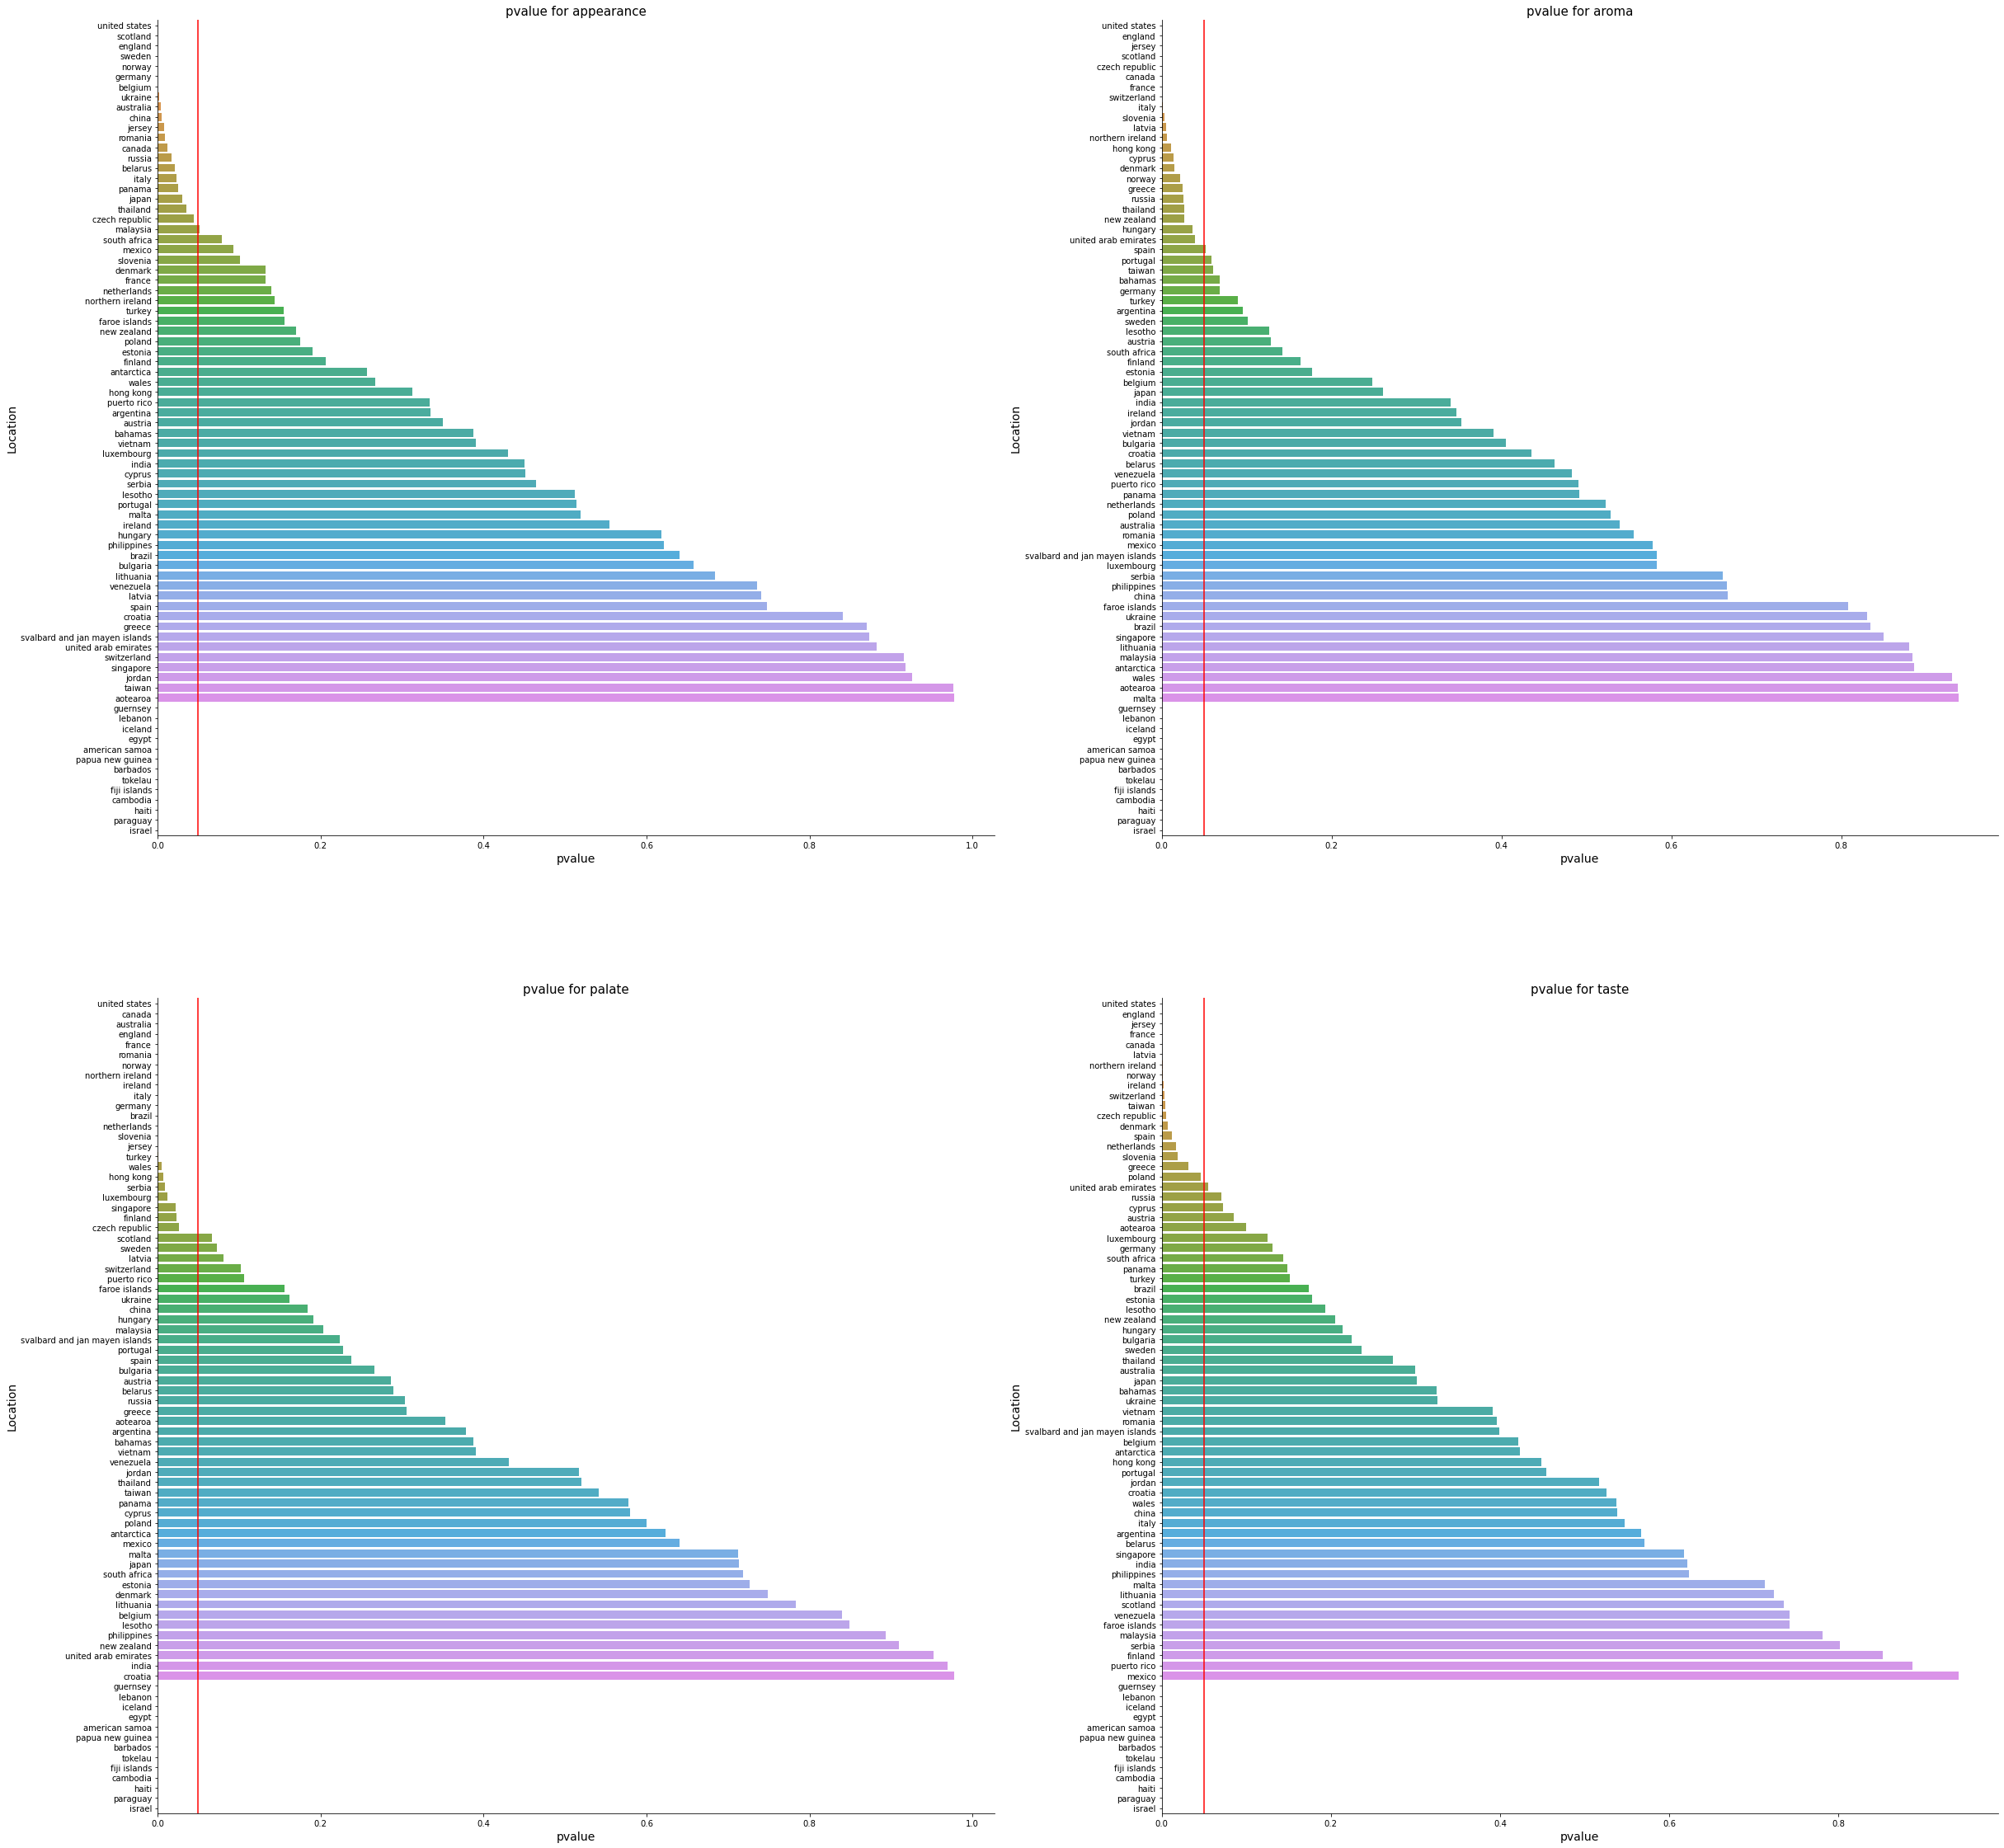

In [120]:
fig, axs = plt.subplots(2, 2, figsize=(40, 40))
ax = (axs[0, 0],axs[0, 1],axs[1, 0],axs[1, 1])
for idx,att in enumerate(beer_attributes):
    sns.barplot(data=t_test_country_df, x=t_test_country_df[str(att)+'_pvalue'], y=t_test_country_df.sort_values(str(att)+'_pvalue').country, ax=ax[idx])
    ax[idx].axvline(x = 0.05, color = 'r')
    ax[idx].set_title(f"pvalue for {att}", fontsize = 15)
    ax[idx].set_xlabel("pvalue", fontsize = 14)
    ax[idx].set_ylabel("Location", fontsize = 14)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].spines['top'].set_visible(False)

# 4.  Recommender system
The fist step use a k-NN algorithm to select the top K users who share the same rating patterns. To performs a k-NN one must choose two important parameters : k and the similarity metric

1) Similarity metric between two user x and y : Pearson correlation

$$
{\displaystyle \operatorname {simil} (x,y)= d_{ecdn} = \sqrt{\displaystyle\sum_{i=1}^{n} (x_i-y_i)^2}}
$$

Where $I_{xy}$ is the set of item rated by both users, $r_{y,i}$ is the rating of user y for the item i and ${\bar {r_{x}}=\dfrac{1}{I_{x}}{\sum \limits _{i\in I_{x}}r_{x,i}}}$.

There is plenty of other different ways to calculate the similarity. It could be interesting to evulate how it impact the recommender system but it has been already discussed in previous papers. (https://arxiv.org/abs/1301.7363)

2) Choosing K

It's impossible to answer alredy give an answer, the k-NN algorithm has to be tested with different k to evualte what's which gives the lowest error using leave-one-out (LOO) cross-validation.

The second step is based on the next formula to predict the rate of the active user x for a beer i rated by all the user y in K:

$$r_{x,i}={\bar {r_{x}}}+k\sum \limits _{y\in K}\operatorname {simil} (x,y)(r_{y,i}-{\bar {r_{y}}})$$

It is now possible to recommend for the user x the beer with the highest precdicted rate.

There is two issues here : scalabilty and sparsity.



### Sparsity

The user-based recommender system is based on the fact that two different users rated the same beer. But there is certainly a lot users with little or no shared ratings. Let's try to evaluate it by showing the perrcentage beers with less than 5 ratings.


In [121]:
(len(beers_ba[beers_ba.nbr_ratings<5])/len(beers_ba))*100

65.75921487912315

So there is 65.76% of beers with less than 5 reviews, which will of course impact the result of the recommender system. It will be bias and will have more probability to recommend the 34,24% beers becaus they have more reviews thus are more likely to be shared by two users.
### Sclalabity

There is no real way of dealing with that problem other than minimizing the recommender system algorithm. There is the possibility of trying diffrent method aplication for the recommender system but here we will stick with the user-based collaborative filtering method.
### KNN model
The features would be a set of all the ratings for each beers (taking only the beers rated by the active user). Having thus a dimension of n = #beers rated.

The outcome would be the users id.

So giving the set of rates made by the active user we would predict the top K nearest users and then predict the rate of the active user for all the beer already rated by the K users.

### Bag of beers

In [122]:
import pandas as pd
import numpy as np
import json

In [123]:
def construct_beers_dict_from_file(file_path:str):
    beers_dict = {}
    beer_id = ''
    user_id = ''
    rating = None
    with open(file_path, 'r', encoding="utf8") as r_file:
        for line in r_file:
            if line.split(':')[0] == 'beer_id':
                beer_id = line.split(':')[1].strip()
            elif line.split(':')[0] == 'user_id':
                user_id = line.split(':')[1].strip()
            elif line.split(':')[0] == 'rating':
                rating = line.split(':')[1].strip()
            elif line == '\n':
                if beer_id and user_id and rating: #This is to avoid possible malformed entries in the txt file
                    if not beer_id in beers_dict:
                        beers_dict[beer_id] = {user_id: rating}
                    else:
                        beers_dict[beer_id][user_id] = rating
                beer_id = ''
                user_id = ''
                rating = None
    return beers_dict

In [124]:
sample_file = './datasets/BeerAdvocate/reviews_sample.txt'

In [125]:
beers_dict = construct_beers_dict_from_file(sample_file)

In [126]:
len(beers_dict)

4368

In [127]:
with open('./datasets/bag_of_beers/sample.json', 'w') as fp:
    json.dump(beers_dict, fp)

### Reading dataset

Here the datasets are zipped to reduce space on the Github repository 

In [128]:
df = pd.read_json('./datasets/bag_of_beers/sample.json.zip')
df.head()

,142544,19590,19827,20841,20842,22659,153718,825,7331,178689,...,49591,41751,26260,181723,98996,87337,73035,32047,110372,5488
nmann08.184925,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stjamesgate.163714,NaN,3.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdagnew.19527,NaN,3.73,3.97,3.95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98
helloloser12345.10867,NaN,3.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cypressbob.3708,NaN,4.00,4.20,4.29,3.98,3.96,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalizing the matrix

In [129]:
#bag_of_beers_matrix=csr_matrix(bag_of_beers.values)
bag_of_beers_matrix = bag_of_beers.as_matrix()
user_ratings_mean = np.mean(bag_of_beers_matrix, axis = 1)
bag_of_beers_matrix_demeaned = bag_of_beers_matrix - user_ratings_mean.reshape(-1, 1)

NameError: name 'bag_of_beers' is not defined

### SVD
Wihout using scipy module (not efficient):

In [ ]:
'''
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    """
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter
    """
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = np.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:

            break

    return P, Q.T

R = np.array(df.fillna(0))
# N: num of User
N = len(R)
# M: num of Beers
M = len(R[0])
# Num of Features
K = 3

 
P = np.random.rand(N,K)
Q = np.random.rand(M,K)

 

nP, nQ = matrix_factorization(R, P, Q, K)

nR = np.dot(nP, nQ.T)

predict_vote=pd.DataFrame(nR)
predict_vote.head()
'''


Using scipy module

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(bag_of_beers_matrix_demeaned, k = 50)

In [ ]:
sigma = np.diag(sigma)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [ ]:
def recommend_beers(predictions_df, userID, beers_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.UserID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
    print 'Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['MovieID'].isin(user_full['MovieID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'MovieID',
               right_on = 'MovieID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_beers(preds_df, 837, movies_df, ratings_df, 10)

### KNN
Using cosine distance

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix



model_knn=NearestNeighbors(metric="cosine",algorithm="brute")
model_knn.fit(bag_of_beers_matrix)

In [ ]:
query_index = 301

distances,indices=model_knn.kneighbors(bag_of_beers.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

print("Distances -->",distances," Indices -->",indices)
 
print(distances.flatten())
print(len(distances.flatten()))
 
for i in range(0,len(distances.flatten())):
    if i==0:
        print("Recommendation for {0}:\n".format(bag_of_beers.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}:".format(i,bag_of_beers.index[indices.flatten()[i]],distances.flatten()[i]))